In [ ]:
import warnings
warnings.filterwarnings('ignore')

##Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import read_csv
from sklearn import preprocessing
import numpy as np
from collections import Counter
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

##ETL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##EDA

In [ ]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data.shape

(299, 13)

checking the shape of teh dataframe

In [ ]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

checking if there is any null value

In [ ]:
data[data.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


checking if there is any duplicate value

### Feature Wise Individual EDA

####AGE

Top 5 Most Common Values in "AGE" column: 
60.0    33
50.0    27
65.0    26
70.0    25
45.0    19
Name: age, dtype: int64

Top 5 Least Common Values in "AGE" column: 
43.0    1
86.0    1
81.0    1
79.0    1
41.0    1
Name: age, dtype: int64

Axes(0.125,0.11;0.775x0.77)


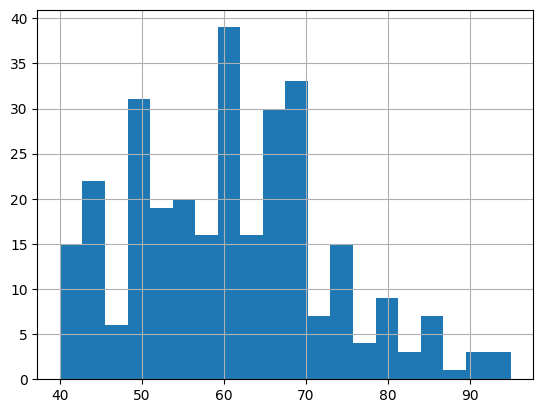

In [ ]:
print('Top 5 Most Common Values in "AGE" column: ')
print(data['age'].value_counts().nlargest(5))
print()
print('Top 5 Least Common Values in "AGE" column: ')
print(data['age'].value_counts().nsmallest(5))
print()
print(data['age'].hist(bins=20))

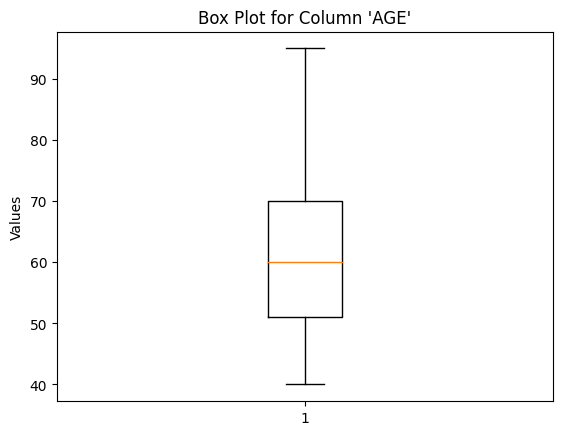

In [ ]:
plt.boxplot(data['age'])
plt.title("Box Plot for Column 'AGE'")
plt.ylabel('Values')
plt.show()

####ANAEMIA

Top 5 Most Common Values in "ANAEMIA" column: 
0    170
1    129
Name: anaemia, dtype: int64

Top 5 Least Common Values in "ANAEMIA" column: 
1    129
0    170
Name: anaemia, dtype: int64



<Axes: >

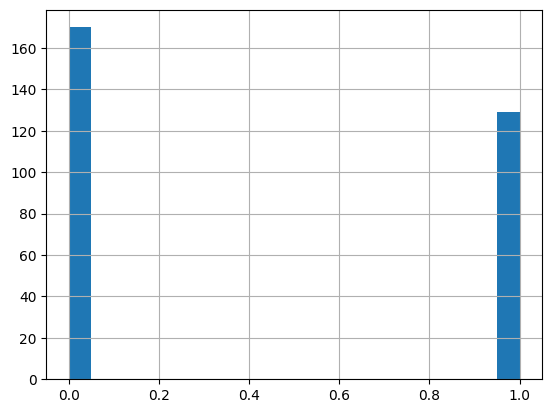

In [ ]:
print('Top 5 Most Common Values in "ANAEMIA" column: ')
print(data['anaemia'].value_counts().nlargest(5))
print()
print('Top 5 Least Common Values in "ANAEMIA" column: ')
print(data['anaemia'].value_counts().nsmallest(5))
print()
data['anaemia'].hist(bins=20)

####CREATININE PHOSPHOKINASE

Top 5 Most Common Values in "CREATININE PHOSPHOKINASE" column: 
582    47
66      4
129     4
231     3
69      3
Name: creatinine_phosphokinase, dtype: int64

Top 5 Least Common Values in "CREATININE PHOSPHOKINASE" column: 
151    1
320    1
244    1
62     1
121    1
Name: creatinine_phosphokinase, dtype: int64

Axes(0.125,0.11;0.775x0.77)


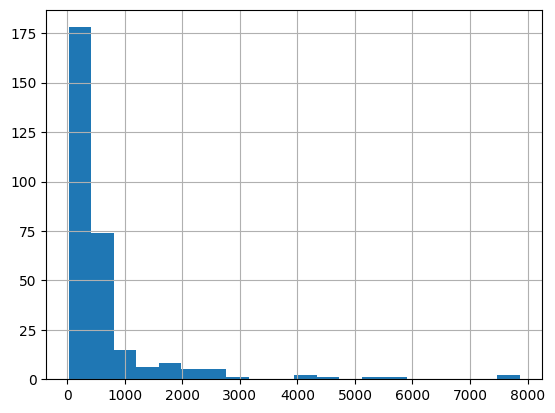

In [ ]:
print('Top 5 Most Common Values in "CREATININE PHOSPHOKINASE" column: ')
print(data['creatinine_phosphokinase'].value_counts().nlargest(5))
print()
print('Top 5 Least Common Values in "CREATININE PHOSPHOKINASE" column: ')
print(data['creatinine_phosphokinase'].value_counts().nsmallest(5))
print()
print(data['creatinine_phosphokinase'].hist(bins=20))

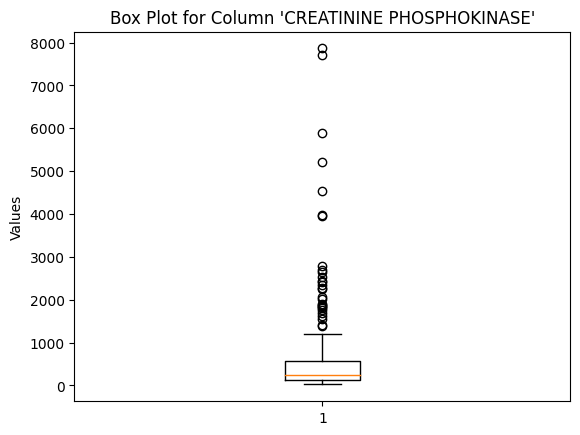

In [ ]:
plt.boxplot(data['creatinine_phosphokinase'])
plt.title("Box Plot for Column 'CREATININE PHOSPHOKINASE'")
plt.ylabel('Values')
plt.show()

####DIABETES

Top 5 Most Common Values in "DIABETES" column: 
0    174
1    125
Name: diabetes, dtype: int64

Top 5 Least Common Values in "DIABETES" column: 
1    125
0    174
Name: diabetes, dtype: int64

Axes(0.125,0.11;0.775x0.77)


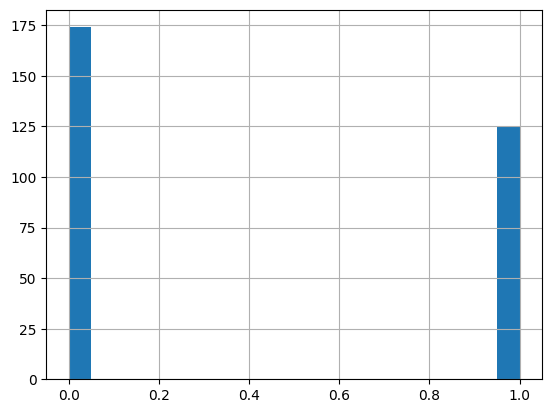

In [ ]:
print('Top 5 Most Common Values in "DIABETES" column: ')
print(data['diabetes'].value_counts().nlargest(5))
print()
print('Top 5 Least Common Values in "DIABETES" column: ')
print(data['diabetes'].value_counts().nsmallest(5))
print()
print(data['diabetes'].hist(bins=20))

####EJECTION FRACTION

Top 5 Most Common Values in "EJECTION FRACTION" column: 
35    49
38    40
40    37
25    36
30    34
Name: ejection_fraction, dtype: int64

Top 5 Least Common Values in "EJECTION FRACTION" column: 
65    1
14    1
80    1
70    1
15    2
Name: ejection_fraction, dtype: int64

Axes(0.125,0.11;0.775x0.77)


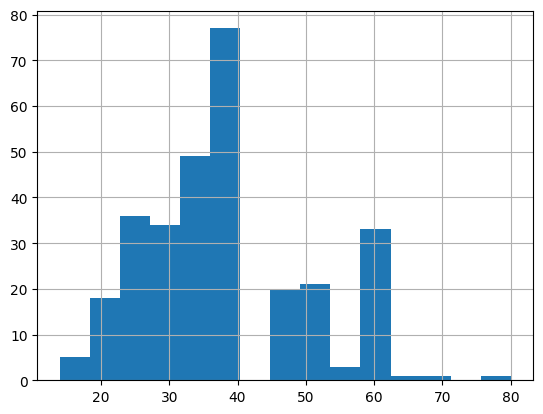

In [ ]:
print('Top 5 Most Common Values in "EJECTION FRACTION" column: ')
print(data['ejection_fraction'].value_counts().nlargest(5))
print()
print('Top 5 Least Common Values in "EJECTION FRACTION" column: ')
print(data['ejection_fraction'].value_counts().nsmallest(5))
print()
print(data['ejection_fraction'].hist(bins=15))

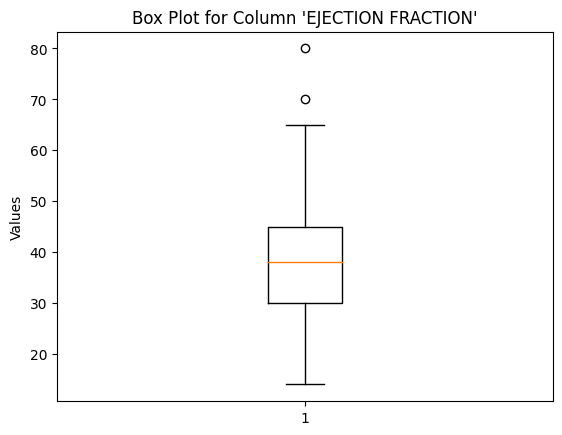

In [ ]:
plt.boxplot(data['ejection_fraction'])
plt.title("Box Plot for Column 'EJECTION FRACTION'")
plt.ylabel('Values')
plt.show()

####HIGH BLOOD PRESSURE

Top 5 Most Common Values in "HIGH BLOOD PRESSURE" column: 
0    194
1    105
Name: high_blood_pressure, dtype: int64

Top 5 Least Common Values in "HIGH BLOOD PRESSURE" column: 
1    105
0    194
Name: high_blood_pressure, dtype: int64

Axes(0.125,0.11;0.775x0.77)


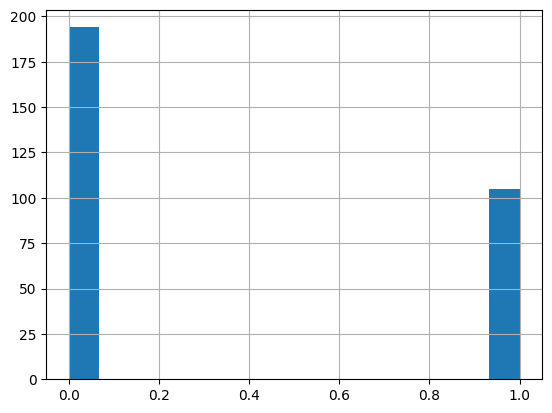

In [ ]:
print('Top 5 Most Common Values in "HIGH BLOOD PRESSURE" column: ')
print(data['high_blood_pressure'].value_counts().nlargest(5))
print()
print('Top 5 Least Common Values in "HIGH BLOOD PRESSURE" column: ')
print(data['high_blood_pressure'].value_counts().nsmallest(5))
print()
print(data['high_blood_pressure'].hist(bins=15))

####PLATELETS

Top 5 Most Common Values in "PLATELETS" column: 
263358.03    25
221000.00     4
279000.00     4
271000.00     4
305000.00     4
Name: platelets, dtype: int64

Top 5 Least Common Values in "PLATELETS" column: 
260000.0    1
186000.0    1
130000.0    1
371000.0    1
151000.0    1
Name: platelets, dtype: int64

Axes(0.125,0.11;0.775x0.77)


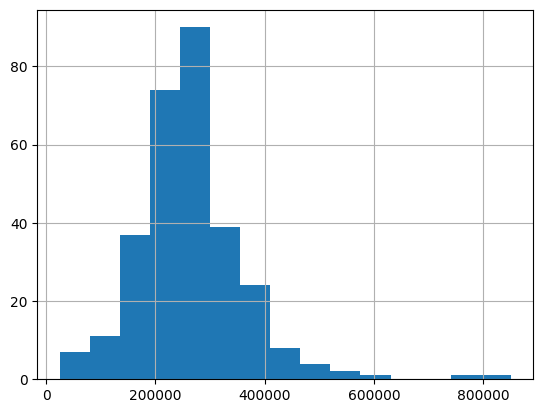

In [ ]:
print('Top 5 Most Common Values in "PLATELETS" column: ')
print(data['platelets'].value_counts().nlargest(5))
print()
print('Top 5 Least Common Values in "PLATELETS" column: ')
print(data['platelets'].value_counts().nsmallest(5))
print()
print(data['platelets'].hist(bins=15))

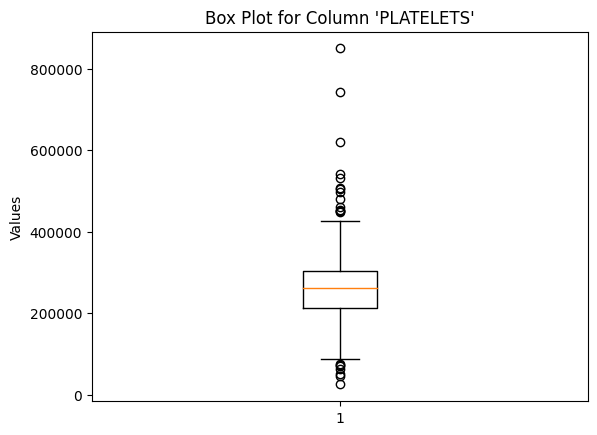

In [ ]:
plt.boxplot(data['platelets'])
plt.title("Box Plot for Column 'PLATELETS'")
plt.ylabel('Values')
plt.show()

####SERUM CREATININE

Top 5 Most Common Values in "SERUM CREATININE" column: 
1.0    50
1.1    32
0.9    32
1.2    24
0.8    24
Name: serum_creatinine, dtype: int64

Top 5 Least Common Values in "SERUM CREATININE" column: 
0.50    1
5.00    1
0.75    1
6.10    1
3.40    1
Name: serum_creatinine, dtype: int64

Axes(0.125,0.11;0.775x0.77)


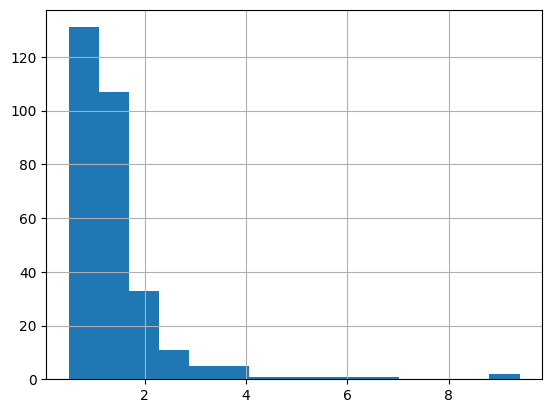

In [ ]:
print('Top 5 Most Common Values in "SERUM CREATININE" column: ')
print(data['serum_creatinine'].value_counts().nlargest(5))
print()
print('Top 5 Least Common Values in "SERUM CREATININE" column: ')
print(data['serum_creatinine'].value_counts().nsmallest(5))
print()
print(data['serum_creatinine'].hist(bins=15)) 

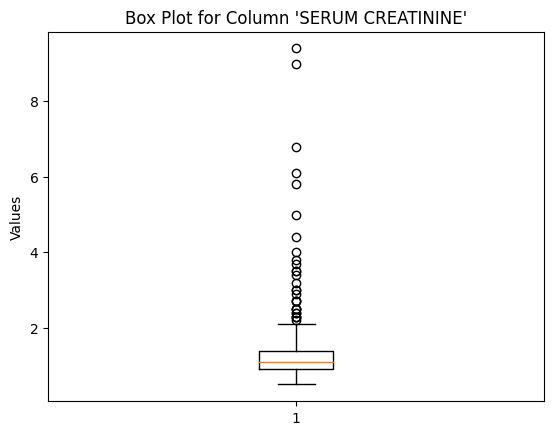

In [ ]:
plt.boxplot(data['serum_creatinine'])
plt.title("Box Plot for Column 'SERUM CREATININE'")
plt.ylabel('Values')
plt.show()

####SERUM SODIUM

Top 5 Most Common Values in "SERUM SODIUM" column: 
136    40
137    38
140    35
134    32
138    23
Name: serum_sodium, dtype: int64

Top 5 Least Common Values in "SERUM SODIUM" column: 
121    1
116    1
146    1
126    1
124    1
Name: serum_sodium, dtype: int64

Axes(0.125,0.11;0.775x0.77)


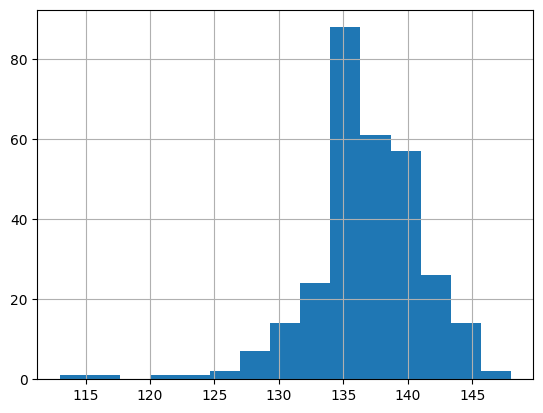

In [ ]:
print('Top 5 Most Common Values in "SERUM SODIUM" column: ')
print(data['serum_sodium'].value_counts().nlargest(5))
print()
print('Top 5 Least Common Values in "SERUM SODIUM" column: ')
print(data['serum_sodium'].value_counts().nsmallest(5))
print()
print(data['serum_sodium'].hist(bins=15))

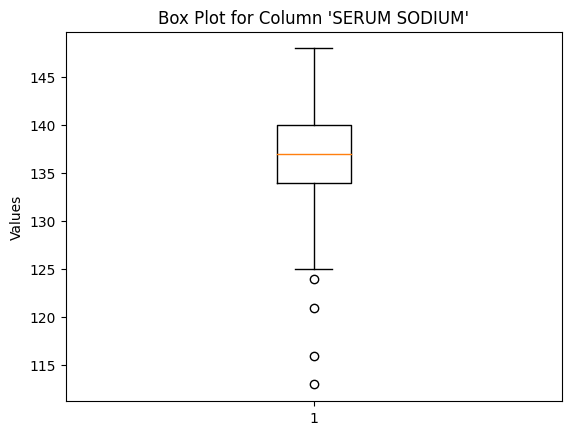

In [ ]:
plt.boxplot(data['serum_sodium'])
plt.title("Box Plot for Column 'SERUM SODIUM'")
plt.ylabel('Values')
plt.show()

####SEX

Top 5 Most Common Values in "SEx" column: 
1    194
0    105
Name: sex, dtype: int64

Top 5 Least Common Values in "SEX" column: 
0    105
1    194
Name: sex, dtype: int64

Axes(0.125,0.11;0.775x0.77)


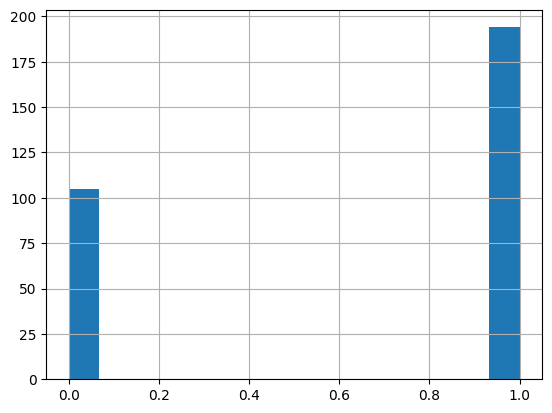

In [ ]:
print('Top 5 Most Common Values in "SEx" column: ')
print(data['sex'].value_counts().nlargest(5))
print()
print('Top 5 Least Common Values in "SEX" column: ')
print(data['sex'].value_counts().nsmallest(5))
print()
print(data['sex'].hist(bins=15))

####SMOKING

Top 5 Most Common Values in "SMOKING" column: 
0    203
1     96
Name: smoking, dtype: int64

Top 5 Least Common Values in "SMOKING" column: 
1     96
0    203
Name: smoking, dtype: int64

Axes(0.125,0.11;0.775x0.77)


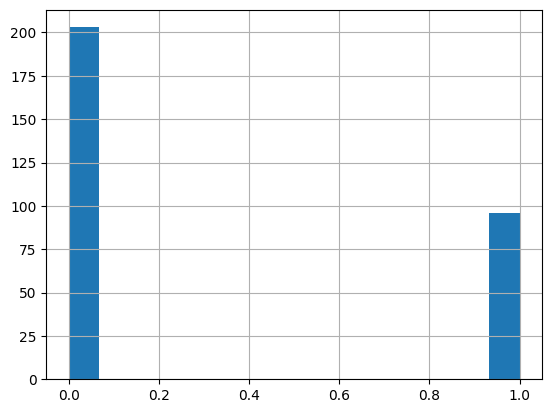

In [ ]:
print('Top 5 Most Common Values in "SMOKING" column: ')
print(data['smoking'].value_counts().nlargest(5))
print()
print('Top 5 Least Common Values in "SMOKING" column: ')
print(data['smoking'].value_counts().nsmallest(5))
print()
print(data['smoking'].hist(bins=15))

####TIME

Top 5 Most Common Values in "TIME" column: 
250    7
187    7
10     6
186    6
107    6
Name: time, dtype: int64

Top 5 Least Common Values in "TIME" column: 
175    1
185    1
193    1
195    1
194    1
Name: time, dtype: int64

Axes(0.125,0.11;0.775x0.77)


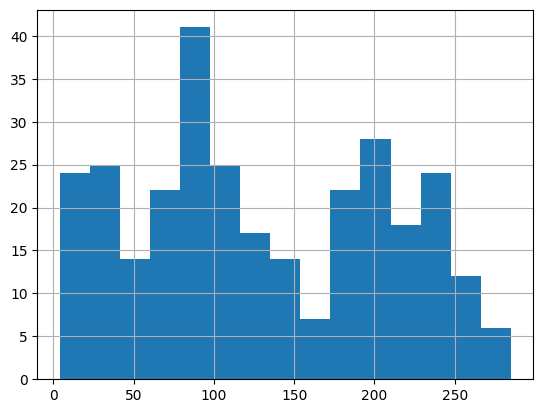

In [ ]:
print('Top 5 Most Common Values in "TIME" column: ')
print(data['time'].value_counts().nlargest(5))
print()
print('Top 5 Least Common Values in "TIME" column: ')
print(data['time'].value_counts().nsmallest(5))
print()
print(data['time'].hist(bins=15))

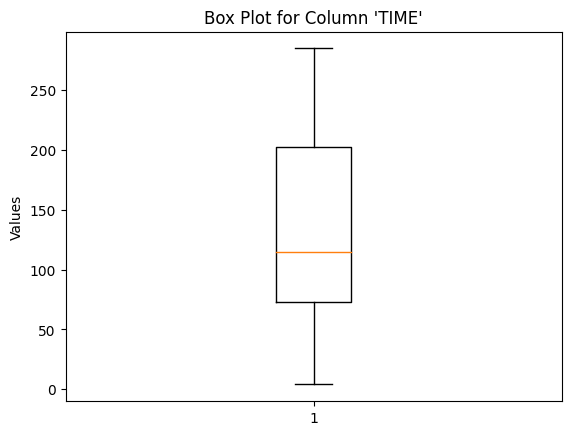

In [ ]:
plt.boxplot(data['time'])
plt.title("Box Plot for Column 'TIME'")
plt.ylabel('Values')
plt.show()

####CORRELATION HEATMAP

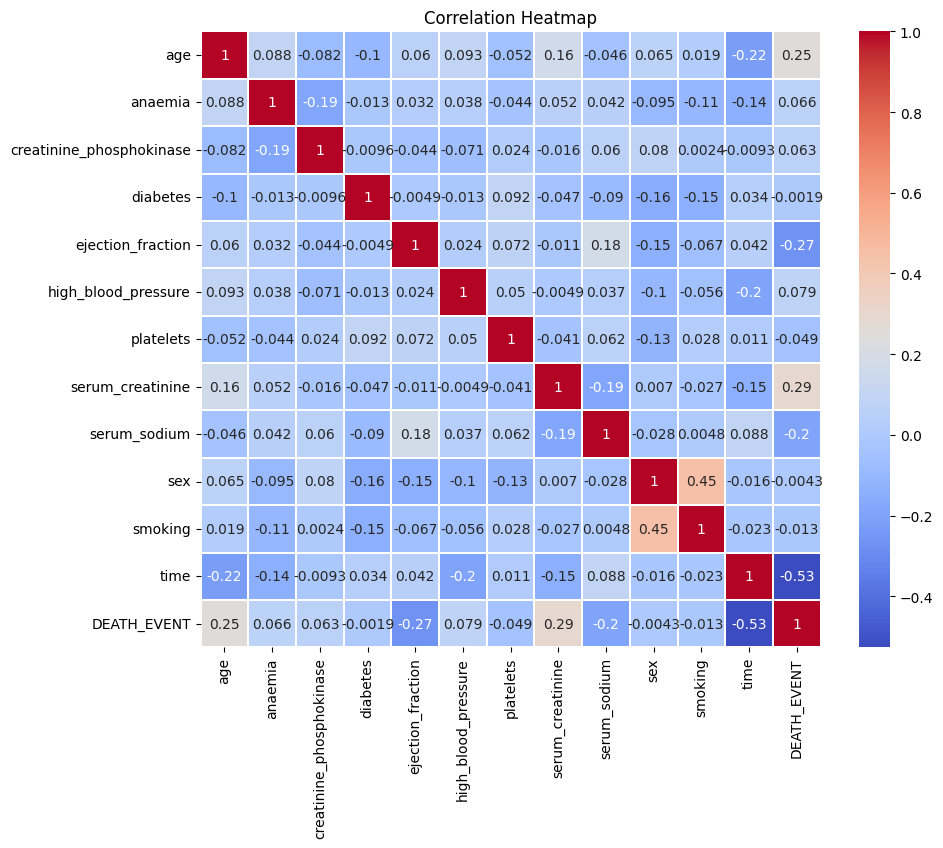

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.1)
plt.title("Correlation Heatmap")
plt.show()

SCATTER PLOT BETWEEN EACH FEATURE

In [ ]:
sns.pairplot(data)
sns.pairplot(data, kind='reg')
plt.show()

##Data Preprocessing from Scratch

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1) 
    
    return multiple_outliers

Cheaking for outliers

In [ ]:
data.loc[detect_outliers(data,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"])]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
38,60.0,0,2656,1,30,0,305000.00,2.3,137,1,0,30,0
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
163,50.0,1,2334,1,35,0,75000.00,0.9,142,0,0,126,1
200,63.0,1,1767,0,45,0,73000.00,0.7,137,1,0,186,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
217,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196,1
117,85.0,1,102,0,60,0,507000.00,3.2,138,0,0,94,0
167,59.0,0,66,1,20,0,70000.00,2.4,134,1,0,135,1
281,70.0,0,582,0,40,0,51000.00,2.7,136,1,1,250,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


The outliers in our dataset

In [ ]:
data = data.drop(detect_outliers(data,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]),axis = 0).reset_index(drop=True)

removing the outliers

In [ ]:
data.shape

(289, 13)

In [ ]:
(299-289)/299*100 #Percentage of data which is outlier in out dataset

3.3444816053511706

In [ ]:
data['creatinine_phosphokinase_log'] = np.log(data['creatinine_phosphokinase'])
data['serum_creatinine_log'] = np.log(data['serum_creatinine'])

Log transformation of the two squewed feature column

<Axes: >

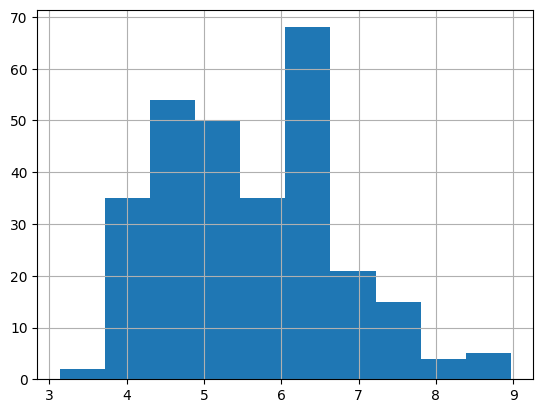

In [ ]:
data['creatinine_phosphokinase_log'].hist()

<Axes: >

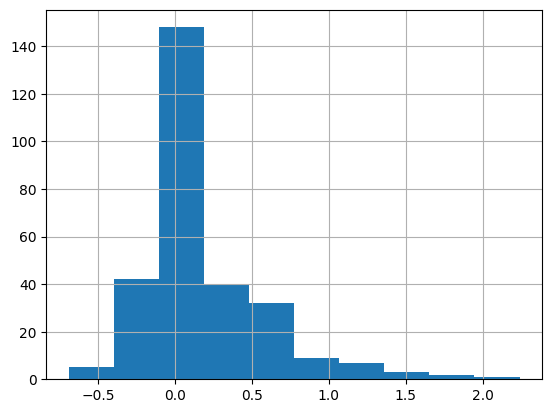

In [ ]:
data['serum_creatinine_log'].hist()

Histogram of creatinine_phosphokinase and serum_creatinine after log transform.

In [ ]:
scaler = preprocessing.StandardScaler()
scaled_input = scaler.fit_transform(data[['age', 'creatinine_phosphokinase_log', 'ejection_fraction', 'platelets', 'serum_creatinine_log', 'serum_sodium', 'time' ]])
scaled_input
data_stand = pd.DataFrame(scaled_input,columns=['age', 'creatinine_phosphokinase_log', 'ejection_fraction', 'platelets', 'serum_creatinine_log', 'serum_sodium', 'time' ])
data_standed = pd.concat([data_stand, data[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']]], axis=1)

Scaling and Concatinating data to get the final perprocessed dataset

In [ ]:
data_standed.head()

,age,creatinine_phosphokinase_log,ejection_fraction,platelets,serum_creatinine_log,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,1.189344,0.664264,-1.550559,0.015424,1.112949,-1.558990,-1.635850,0,0,1,1,0,1
1,-0.488705,3.011063,0.011108,-0.002634,-0.194972,-0.151027,-1.609907,0,0,0,1,0,1
2,0.350319,-0.582395,-1.550559,-1.117326,0.204801,-1.793651,-1.596935,0,0,0,1,1,1
3,-0.908218,-0.829477,-1.550559,-0.589443,1.112949,0.083633,-1.596935,1,0,0,1,0,1
4,2.447881,-1.604215,0.184626,-0.655428,1.352456,-1.089669,-1.583964,1,0,1,1,1,1


In [ ]:
# data_standed.to_csv("/content/drive/MyDrive/255/project/cleaned_log_ds.csv")

In [ ]:
data_standed['DEATH_EVENT'].value_counts()

0    198
1     91
Name: DEATH_EVENT, dtype: int64

Label Imbalanced

In [ ]:
X = data_standed.drop(['DEATH_EVENT'],axis=1)
y = data_standed['DEATH_EVENT']

In [ ]:
# rng = np.random.default_rng(42)
# data_standed = np.random.random((100, 5))
# msk = rng.random(len(data_standed)) < 0.8
# train = data_standed[msk]
# test = data_standed[~msk]

In [ ]:
msk = np.random.rand(len(data_standed)) < 0.8
train = data_standed[msk]
test = data_standed[~msk]

Data Split

In [ ]:
train['DEATH_EVENT'].value_counts()

0    158
1     70
Name: DEATH_EVENT, dtype: int64

In [ ]:
test['DEATH_EVENT'].value_counts()

0    40
1    21
Name: DEATH_EVENT, dtype: int64

Stratified Labels

In [ ]:
X_train = train.drop(['DEATH_EVENT'],axis=1)
X_test = test.drop(['DEATH_EVENT'],axis=1)

y_train = train['DEATH_EVENT']
y_test = test['DEATH_EVENT']

In [ ]:
X_train_arr = X_train.to_numpy()
y_train_arr = y_train.to_numpy().reshape(-1, 1)

X_test_arr = X_test.to_numpy()
y_test_arr = y_test.to_numpy().reshape(-1, 1)

Evaludation function to check for model's performance

In [ ]:
def evaluation_metrics(y_test, y_pred):
    '''
    Function for calculating and printing precision, recall, accuracy, and F1 score.
    '''
    def precision(y_test, y_pred):
        TP = sum([1 for i in range(len(y_test)) if y_test[i] == y_pred[i] == 1])
        FP = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred[i] == 1])

        if TP + FP == 0:
            return 0

        return TP / (TP + FP)

    def recall(y_test, y_pred):
        TP = sum([1 for i in range(len(y_test)) if y_test[i] == y_pred[i] == 1])
        FN = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred[i] == 0])

        if TP + FN == 0:
            return 0

        return TP / (TP + FN)

    def accuracy(y_test, y_pred):
        correct_predictions = sum([1 for i in range(len(y_test)) if y_test[i] == y_pred[i]])
        return correct_predictions / len(y_test)

    def f1_score(y_test, y_pred):
        p = precision(y_test, y_pred)
        r = recall(y_test, y_pred)

        if p + r == 0:
            return 0

        return 2 * (p * r) / (p + r)

    y_test = y_test.flatten().tolist()
    y_pred = y_pred.flatten().tolist()

    print("Precision: ", precision(y_test, y_pred))
    print("Recall: ", recall(y_test, y_pred))
    print("Accuracy: ", accuracy(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))

# Example usage:
# evaluation_metrics(y_test_arr, y_pred)


In [ ]:
def accuracy_score(y_test, y_pred):
    ''' 
    Function for calculating accuracy manually.
    '''
    # Converting to list for manipulation
    y_test = y_test.tolist()
    # y_pred = y_pred.tolist()

    correct_predictions = sum([1 for i in range(len(y_test)) if y_test[i] == y_pred[i]])
    accuracy = correct_predictions / len(y_test)
    
    return accuracy

## Classification Algosithms from Scratch

### Logistic Regression with L2 regularization

In [ ]:
# import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta, lambda_reg):
    m = len(y)
    h = sigmoid(X @ theta)
    reg_term = (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))
    return (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h)) + reg_term

def gradient(X, y, theta, lambda_reg):
    m = len(y)
    h = sigmoid(X @ theta)
    reg_term = (lambda_reg / m) * theta
    reg_term[0] = 0  # Exclude the bias term from regularization
    return (1 / m) * (X.T @ (h - y)) + reg_term

def logistic_regression(X_train_arr, y_train_arr, alpha, num_iters, lambda_reg, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
        
    theta = np.random.rand(X_train_arr.shape[1], 1)  # Randomly initialize theta values
    cost = []
    
    for i in range(num_iters):
        cost_val = cost_function(X_train_arr, y_train_arr, theta, lambda_reg)
        cost.append(cost_val)
        theta = theta - alpha * gradient(X_train_arr, y_train_arr, theta, lambda_reg)
        
    return theta, cost

# Usage example
alpha = 0.001
num_iters = 50000
lambda_reg = 1  # Regularization strength; try different values to see the effect
random_state = 91

theta, cost = logistic_regression(X_train_arr, y_train_arr, alpha, num_iters, lambda_reg, random_state)

y_pred = sigmoid(X_test_arr @ theta)
y_pred = (y_pred >= 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_arr, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7540983606557377


Fine Tuning the logistic regression function on different hyperparameters

In [ ]:
ALPHA = [0.2,0.1,0.05,0.01]
NUM_ITERATION = [5000,10000,20000,30000]
LAMBDA_REG = [0.1,0.5,1,3,5,7,10]

scores = dict()
for alpha in ALPHA:
   for num_iter in NUM_ITERATION:
     for l2 in LAMBDA_REG:
        cost_ = []
        
        theta, cost = logistic_regression(X_train_arr, y_train_arr, alpha, num_iter, l2, random_state)
        cost_.append(cost)
        
        y_pred = sigmoid(X_test_arr @ theta)
        y_pred = (y_pred >= 0.5).astype(int)
        
        str_t = "num_iter: " + str(num_iter) + ", alpha: " + str(alpha) + ", lambda_l2: " + str(l2)
        
        accuracy = accuracy_score(y_test_arr, y_pred)
        scores[str_t] = accuracy

In [ ]:
def fun(dict_):
  return dict_[1]

sorted(scores.items(),reverse=True, key = fun)[:1]

[('num_iter: 5000, alpha: 0.2, lambda_l2: 0.1', 0.7540983606557377)]

checking for the optimum set of hyperparemeter

In [ ]:
alpha = 0.2
num_iters = 5000
lambda_reg = 0.1  # Regularization strength; try different values to see the effect

theta, cost = logistic_regression(X_train_arr, y_train_arr, alpha, num_iters, lambda_reg,random_state=91)

y_pred = sigmoid(X_test_arr @ theta)
y_pred = (y_pred >= 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_arr, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7540983606557377


In [ ]:
evaluation_metrics(y_test_arr, y_pred)

Precision:  0.625
Recall:  0.7142857142857143
Accuracy:  0.7540983606557377
F1 Score:  0.6666666666666666


Final Score without SMOTE

In [ ]:
def evaluation_metrics(y_test, y_pred):
    '''
    Function for calculating and printing precision, recall, accuracy, and F1 score.
    '''
    def precision(y_test, y_pred):
        TP = sum([1 for i in range(len(y_test)) if y_test[i] == y_pred[i] == 1])
        FP = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred[i] == 1])

        if TP + FP == 0:
            return 0

        return TP / (TP + FP)

    def recall(y_test, y_pred):
        TP = sum([1 for i in range(len(y_test)) if y_test[i] == y_pred[i] == 1])
        FN = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred[i] == 0])

        if TP + FN == 0:
            return 0

        return TP / (TP + FN)

    def accuracy(y_test, y_pred):
        correct_predictions = sum([1 for i in range(len(y_test)) if y_test[i] == y_pred[i]])
        return correct_predictions / len(y_test)

    def f1_score(y_test, y_pred):
        p = precision(y_test, y_pred)
        r = recall(y_test, y_pred)

        if p + r == 0:
            return 0

        return 2 * (p * r) / (p + r)

    # y_test = y_test.flatten().tolist()
    # y_pred = y_pred.flatten().tolist()

    print("Precision: ", precision(y_test, y_pred))
    print("Recall: ", recall(y_test, y_pred))
    print("Accuracy: ", accuracy(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))

# Example usage:
# evaluation_metrics(y_test_arr, y_pred)


###Decision Tree Classifier

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1,
                 max_features=None, criterion='gini', splitter='best', class_weight=None,
                 random_state=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.criterion = criterion
        self.splitter = splitter
        self.class_weight = class_weight
        self.random_state = random_state
        self.tree = None
    
    def fit(self, X, y):
        self.n_features = X.shape[1]
        self.n_classes = len(np.unique(y))
        self.tree = self._grow_tree(X, y)
    
    def _best_split(self, X, y):
        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes)]
        best_gini = float('inf')
        best_idx, best_thr = None, None
        if self.splitter == 'random':
            idxs = np.arange(self.n_features)
            np.random.shuffle(idxs)
        else:
            idxs = range(self.n_features)
        for i in idxs:
            thresholds, classes = zip(*sorted(zip(X[:, i], y)))
            num_left = [0] * self.n_classes
            num_right = num_parent.copy()
            for j in range(1, m):
                c = classes[j - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum((num_left[x] / j) ** 2 for x in range(self.n_classes))
                gini_right = 1.0 - sum((num_right[x] / (m - j)) ** 2 for x in range(self.n_classes))
                gini = (j * gini_left + (m - j) * gini_right) / m
                if thresholds[j] == thresholds[j - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = i
                    best_thr = (thresholds[j] + thresholds[j - 1]) / 2  # midpoint
        return best_idx, best_thr
    
    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes)]
        predicted_class = np.argmax(num_samples_per_class)
        node = {'predicted_class': predicted_class}
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                left_idxs = X[:, idx] < thr
                X_left, y_left = X[left_idxs], y[left_idxs]
                X_right, y_right = X[~left_idxs], y[~left_idxs]
                if len(X_left) > self.min_samples_leaf and len(X_right) > self.min_samples_leaf:
                    node['feature_idx'] = idx
                    node['threshold'] = thr
                    left = self._grow_tree(X_left, y_left, depth + 1)
                    right = self._grow_tree(X_right, y_right, depth + 1)
                    node['left'] = left
                    node['right'] = right
        return node
    
    def predict(self, X):
        return [self._predict(inputs) for inputs in X]
    
    def _predict(self, inputs, node=None):
      if node is None:
          node = self.tree
      if 'feature_idx' not in node:
          return node['predicted_class']
      if inputs[node['feature_idx']] < node['threshold']:
          return self._predict(inputs, node['left'])
      else:
          return self._predict(inputs, node['right'])

    def print_tree(self, node=None, depth=0):
      if node is None:
          node = self.tree
      if 'feature_idx' in node:
          print(' ' * depth, f'X_{node["feature_idx"]} < {node["threshold"]}')
          self.print_tree(node['left'], depth + 1)
          self.print_tree(node['right'], depth + 1)
      else:
          print(' ' * depth, f'class {node["predicted_class"]}')

In [ ]:
def accuracy_score(y_test, y_pred):
    ''' 
    Function for calculating accuracy manually.
    '''
    # Converting to list for manipulation
    y_test = y_test.tolist()
    # y_pred = y_pred.tolist()

    correct_predictions = sum([1 for i in range(len(y_test)) if y_test[i] == y_pred[i]])
    accuracy = correct_predictions / len(y_test)
    
    return accuracy

Decision Tree the logistic regression function on different hyperparameters

In [ ]:
MAX_DEPTH  = [2,3,4,5,6]
MIN_SAMPLES_SPLIT = [1,3,5,7,9]
CRITERION = ["entropy","gini"]
scores = dict()
for max_depth in MAX_DEPTH:
 for min_samples_split in MIN_SAMPLES_SPLIT:
   for criterion in CRITERION:
     clf = DecisionTree(max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion, random_state=41)
     
     # Train the classifier on the training set and evaluate it on the validation set
     clf.fit(X_train.values, y_train.values)
     y_pred = clf.predict(X_test.values)
     acc = accuracy_score(y_test.values, y_pred)
     str_t = "max_depth: " + str(max_depth) + ", min_samples_split: " + str(min_samples_split) + ", criterian: " + criterion
     scores[str_t] = acc

In [ ]:
def fun(dict_):
  return dict_[1]

sorted(scores.items(),reverse=True, key = fun)[:15]

[('max_depth: 3, min_samples_split: 1, criterian: entropy',
  0.8360655737704918),
 ('max_depth: 3, min_samples_split: 1, criterian: gini', 0.8360655737704918),
 ('max_depth: 3, min_samples_split: 3, criterian: entropy',
  0.8360655737704918),
 ('max_depth: 3, min_samples_split: 3, criterian: gini', 0.8360655737704918),
 ('max_depth: 3, min_samples_split: 5, criterian: entropy',
  0.8360655737704918),
 ('max_depth: 3, min_samples_split: 5, criterian: gini', 0.8360655737704918),
 ('max_depth: 3, min_samples_split: 7, criterian: entropy',
  0.8360655737704918),
 ('max_depth: 3, min_samples_split: 7, criterian: gini', 0.8360655737704918),
 ('max_depth: 3, min_samples_split: 9, criterian: entropy',
  0.8360655737704918),
 ('max_depth: 3, min_samples_split: 9, criterian: gini', 0.8360655737704918),
 ('max_depth: 2, min_samples_split: 1, criterian: entropy',
  0.7704918032786885),
 ('max_depth: 2, min_samples_split: 1, criterian: gini', 0.7704918032786885),
 ('max_depth: 2, min_samples_split

checking for the optimum set of hyperparemeter


In [ ]:
clf = DecisionTree(max_depth=3, min_samples_split=1, criterion='entropy',random_state=41)

# Train the classifier on the training data
clf.fit(X_train.values, y_train.values)

# Make predictions on the testing data
y_pred = clf.predict(X_test.values)
print(type(y_pred))
print(type(y_test))
# Calculate the accuracy of the model
evaluation_metrics(y_test.values, y_pred)
print()

<class 'list'>
<class 'pandas.core.series.Series'>
Precision:  0.7391304347826086
Recall:  0.8095238095238095
Accuracy:  0.8360655737704918
F1 Score:  0.7727272727272727



Decison Tree Final Accuracy without SMOTE

In [ ]:
clf.print_tree()

 X_6 < -0.73432804913876
  X_4 < -0.8161246680244516
   X_2 < 0.09786682769166624
    class 1
    class 0
   X_1 < -0.8376725157377556
    class 1
    class 1
  X_4 < 0.6244749502230063
   X_2 < -0.8998644662753637
    class 0
    class 0
   X_0 < 0.6439777740689321
    class 0
    class 1


Decision tree representation

###Random Forest

In [ ]:
import numpy as np
from collections import Counter
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split

def gini_impurity(y):
    count = Counter(y)
    impurity = 1
    for label in count:
        prob = count[label] / len(y)
        impurity -= prob**2
    return impurity

def information_gain(y_left, y_right, parent_impurity):
    p_left = len(y_left) / (len(y_left) + len(y_right))
    p_right = len(y_right) / (len(y_left) + len(y_right))
    return parent_impurity - p_left * gini_impurity(y_left) - p_right * gini_impurity(y_right)

def split(X, y, feature_idx, threshold):
    left_mask = X[:, feature_idx] < threshold
    right_mask = ~left_mask
    return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

def best_split(X, y):
    best_gain = 0
    best_feature_idx, best_threshold = None, None
    parent_impurity = gini_impurity(y)

    for feature_idx in range(X.shape[1]):
        thresholds = np.unique(X[:, feature_idx])
        for threshold in thresholds:
            X_left, X_right, y_left, y_right = split(X, y, feature_idx, threshold)
            if len(y_left) == 0 or len(y_right) == 0:
                continue

            gain = information_gain(y_left, y_right, parent_impurity)
            if gain > best_gain:
                best_gain = gain
                best_feature_idx, best_threshold = feature_idx, threshold

    return best_feature_idx, best_threshold, best_gain

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        if self.max_depth and depth == self.max_depth:
            self.label = Counter(y).most_common(1)[0][0]
            return

        feature_idx, threshold, gain = best_split(X, y)
        if gain == 0:
            self.label = Counter(y).most_common(1)[0][0]
            return

        X_left, X_right, y_left, y_right = split(X, y, feature_idx, threshold)

        self.feature_idx = feature_idx
        self.threshold = threshold
        self.left = DecisionTree(self.max_depth)
        self.right = DecisionTree(self.max_depth)
        self.left.fit(X_left, y_left, depth + 1)
        self.right.fit(X_right, y_right, depth + 1)

    def predict(self, X):
        if hasattr(self, "label"):
            return np.full(X.shape[0], self.label)

        mask = X[:, self.feature_idx] < self.threshold
        y = np.empty(X.shape[0], dtype=int)
        y[mask] = self.left.predict(X[mask])
        y[~mask] = self.right.predict(X[~mask])
        return y

class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = [DecisionTree(max_depth) for _ in range(n_estimators)]

    def fit(self, X, y):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        for tree in self.trees:
            bootstrap_indices = np.random.choice(np.arange(X.shape[0]), size=X.shape[0], replace=True)
            X_bootstrap, y_bootstrap = X[bootstrap_indices], y[bootstrap_indices]
            tree.fit(X_bootstrap, y_bootstrap)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)), dtype=int)
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)
        return np.array([Counter(row).most_common(1)[0][0] for row in predictions])

Fine Tuning the Random Forest Classifier function on different hyperparameters

In [ ]:
MAX_DEPTH  = [1,2,3,4,5]
N_ESTIMATORS = [10,20,30,40,50]
CRITERION = ["entropy","gini"]
scores = dict()
for max_depth in MAX_DEPTH:
   for n_estimators in N_ESTIMATORS:
     rf = RandomForest(n_estimators=n_estimators, max_depth=max_depth,random_state=23)
     
     # Train the classifier on the training set and evaluate it on the validation set
     rf.fit(X_train.values, y_train.values)
     y_pred = rf.predict(X_test.values)
     accuracy = accuracy_score(y_test, y_pred)
     str_t = "max_depth: " + str(max_depth) + ", n_estimators: " + str(n_estimators)
     scores[str_t] = accuracy

In [ ]:
def fun(dict_):
  return dict_[1]

sorted(scores.items(),reverse=True, key = fun)[:15]

[('max_depth: 1, n_estimators: 10', 0.8524590163934426),
 ('max_depth: 1, n_estimators: 20', 0.8524590163934426),
 ('max_depth: 1, n_estimators: 30', 0.8524590163934426),
 ('max_depth: 1, n_estimators: 40', 0.8524590163934426),
 ('max_depth: 1, n_estimators: 50', 0.8524590163934426),
 ('max_depth: 4, n_estimators: 30', 0.8360655737704918),
 ('max_depth: 4, n_estimators: 40', 0.8360655737704918),
 ('max_depth: 5, n_estimators: 30', 0.8360655737704918),
 ('max_depth: 2, n_estimators: 30', 0.819672131147541),
 ('max_depth: 2, n_estimators: 40', 0.819672131147541),
 ('max_depth: 2, n_estimators: 50', 0.819672131147541),
 ('max_depth: 3, n_estimators: 10', 0.819672131147541),
 ('max_depth: 3, n_estimators: 30', 0.819672131147541),
 ('max_depth: 3, n_estimators: 40', 0.819672131147541),
 ('max_depth: 3, n_estimators: 50', 0.819672131147541)]

checking for the optimum set of hyperparemeter


In [ ]:
rf = RandomForest(n_estimators=10, max_depth=1, random_state=6)
rf.fit(X_train.values, y_train.values)
y_pred = rf.predict(X_test.values)
# print("Accuracy:", accuracy_score(y_test, y_pred))
evaluation_metrics(y_test.values, y_pred)

Precision:  0.875
Recall:  0.6666666666666666
Accuracy:  0.8524590163934426
F1 Score:  0.7567567567567567


Random Forest Final Accuracy without SMOTE

###SVC

In [ ]:
# import numpy as np

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def rbf_kernel(x1, x2, gamma=1.0):
    diff = x1 - x2
    distance = np.sum(diff * diff, axis=-1)
    return np.exp(-gamma * distance)
def smo(X, y, C, kernel, tol=1e-3, max_passes=5, random_state=None):
    if random_state is not None:
      np.random.seed(random_state)
    n, m = X.shape
    alpha = np.zeros(n)
    b = 0.0
    passes = 0

    while passes < max_passes:
        num_changed_alphas = 0

        for i in range(n):
            E_i = np.sum(alpha * y * kernel(X, X[i])) - y[i]
            if (y[i] * E_i < -tol and alpha[i] < C) or (y[i] * E_i > tol and alpha[i] > 0):
                j = np.random.choice(list(range(i)) + list(range(i + 1, n)))
                E_j = np.sum(alpha * y * kernel(X, X[j])) - y[j]

                alpha_i_old = alpha[i]
                alpha_j_old = alpha[j]

                if y[i] != y[j]:
                    L = max(0, alpha[j] - alpha[i])
                    H = min(C, C + alpha[j] - alpha[i])
                else:
                    L = max(0, alpha[i] + alpha[j] - C)
                    H = min(C, alpha[i] + alpha[j])

                if L == H:
                    continue

                eta = 2 * kernel(X[i], X[j]) - kernel(X[i], X[i]) - kernel(X[j], X[j])
                if eta >= 0:
                    continue

                alpha[j] -= y[j] * (E_i - E_j) / eta
                alpha[j] = np.clip(alpha[j], L, H)

                if abs(alpha[j] - alpha_j_old) < tol:
                    continue

                alpha[i] += y[i] * y[j] * (alpha_j_old - alpha[j])

                b1 = b - E_i - y[i] * (alpha[i] - alpha_i_old) * kernel(X[i], X[i]) - y[j] * (alpha[j] - alpha_j_old) * kernel(X[i], X[j])
                b2 = b - E_j - y[i] * (alpha[i] - alpha_i_old) * kernel(X[i], X[j]) - y[j] * (alpha[j] - alpha_j_old) * kernel(X[j], X[j])

                if 0 < alpha[i] < C:
                    b = b1
                elif 0 < alpha[j] < C:
                    b = b2
                else:
                    b = (b1 + b2) / 2

                num_changed_alphas += 1

        passes = passes + 1 if num_changed_alphas == 0 else 0

    return alpha, b

def fit(X, y, C=1.0, kernel=rbf_kernel, gamma=1.0, random_state=None):
    alpha, b = smo(X, y, C, lambda x1, x2: kernel(x1, x2, gamma), random_state=random_state)
    support_indices = np.where(alpha > 0)[0]
    support_vectors = X[support_indices]
    support_alphas = alpha[support_indices]
    support_targets = y[support_indices]
    return support_vectors, support_alphas, support_targets, b

def predict(X, support_vectors, support_alphas, support_targets, b, kernel=rbf_kernel, gamma=1.0):
    predictions = np.zeros(X.shape[0])
    for i, x in enumerate(X):
        result = np.sum(support_alphas * support_targets * kernel(support_vectors, x)) + b
        predictions[i] = np.sign(result)
    return predictions

In [ ]:
y_train_edited = y_train.replace(0,-1)
y_test_edited = y_test.replace(0,-1)

Fine Tuning the SVC function on different hyperparameters

In [ ]:
C_VALUES = [0.1, 1, 10, 100]
GAMMA_VALUES = [0.1, 1, 10, 100]

scores = dict()
for c_values in C_VALUES:
   for gamma_values in GAMMA_VALUES:
     support_vectors, support_alphas, support_targets, b = fit(X_train.values, y_train_edited.values, kernel=rbf_kernel, C=c_values, gamma=gamma_values, random_state=44)
     predictions = predict(X_test.values, support_vectors, support_alphas, support_targets, b, kernel=rbf_kernel, gamma=gamma_values)
     # Train the classifier on the training set and evaluate it on the validation set

     accuracy = np.mean(predictions == y_test_edited.values)
     str_t = "gamma_values: " + str(gamma_values) + ", c_values: " + str(c_values)
     scores[str_t] = accuracy

In [ ]:
def fun(dict_):
  return dict_[1]

sorted(scores.items(), reverse=True, key = fun)[:15]

[('gamma_values: 0.1, c_values: 0.1', 0.6557377049180327),
 ('gamma_values: 1, c_values: 0.1', 0.6557377049180327),
 ('gamma_values: 10, c_values: 0.1', 0.6557377049180327),
 ('gamma_values: 100, c_values: 0.1', 0.6557377049180327),
 ('gamma_values: 1, c_values: 1', 0.6557377049180327),
 ('gamma_values: 10, c_values: 1', 0.6557377049180327),
 ('gamma_values: 100, c_values: 1', 0.6557377049180327),
 ('gamma_values: 0.1, c_values: 10', 0.6557377049180327),
 ('gamma_values: 1, c_values: 10', 0.6557377049180327),
 ('gamma_values: 10, c_values: 10', 0.6557377049180327),
 ('gamma_values: 100, c_values: 10', 0.6557377049180327),
 ('gamma_values: 0.1, c_values: 100', 0.6557377049180327),
 ('gamma_values: 1, c_values: 100', 0.6557377049180327),
 ('gamma_values: 10, c_values: 100', 0.6557377049180327),
 ('gamma_values: 100, c_values: 100', 0.6557377049180327)]

checking for the optimum set of hyperparemeter


In [ ]:
# y_train_edited = y_train.replace(0,-1)
# y_test_edited = y_test.replace(0,-1)

gamma = 0.1
# Train the SVC
support_vectors, support_alphas, support_targets, b = fit(X_train.values, y_train_edited.values, kernel=rbf_kernel, C=0.1, gamma=gamma, random_state=44)

# Predict labels for the same dataset (just for demonstration)
predictions = predict(X_test.values, support_vectors, support_alphas, support_targets, b, kernel=rbf_kernel, gamma=gamma)

# Calculate and print the accuracy

accuracy = np.mean(predictions == y_test_edited.values)
print("Accuracy ", accuracy)
# evaluation_metrics(y_test_edited.values, predictions)

Accuracy  0.6557377049180327


###XGBOOST

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve, auc

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# first order gradient
def grad(preds, labels):
    preds = sigmoid(preds)
    return (preds - labels)

# second order gradient
def hess(preds, labels):
    preds = sigmoid(preds)
    return (preds * (1 - preds))

In [ ]:
class TreeNode(object):
    def __init__(self, is_leaf = False, leaf_score = None, split_feature = None, split_threshold = None, 
                 left_child = None, right_child = None, NA_direction = 'left'):
        self.is_leaf = is_leaf # if True, the node is a leaf and no further split necessary
        self.leaf_score = leaf_score # prediction score
        self.split_feature = split_feature
        self.split_threshold = split_threshold
        self.left_child = left_child
        self.right_child = right_child
        self.NA_direction = NA_direction # whether to put NA on left or right

class Tree(object):
    def __init__(self, root = None, min_sample_split = None, col_sub_frac = None, lamda = None, 
                 gamma = None, num_thread = None, min_child_weight = None, random_state=None):
        self.random_state = random_state
        self.root = root
        self.min_sample_split = min_sample_split # minimum samples required for a split
        self.col_sub_frac = col_sub_frac # column subsampling fraction
        self.lamda = lamda #lambda
        self.gamma = gamma #gamma
        self.min_child_weight = min_child_weight # minimum weight for a split
    
    def cal_leaf_score(self, Y):
        # calculate score for a leaf
        # Formula (5): -G / (H + Lambda)
        return - (Y['grad'].sum() / (Y['hess'].sum() + self.lamda))
    
    def cal_split_gain(self, left_Y, right_Y, NA_grad, NA_hess, NA_direction = 'left'):
        # calculate gain from a potential split
        # Formula (7): 0.5 * [GL^2 / (HL+Lambda) + GR^2 / (HR+Lambda) - G^2 / (H+Lambda)] - Gamma
        if (NA_direction == 'left'):
            GL = left_Y['grad'].sum() + NA_grad
            HL = left_Y['hess'].sum() + NA_hess
            GR = right_Y['grad'].sum()
            HR = right_Y['hess'].sum()
        else:
            GL = left_Y['grad'].sum()
            HL = left_Y['hess'].sum()
            GR = right_Y['grad'].sum() + NA_grad
            HR = right_Y['hess'].sum() + NA_hess
        gain = 0.5 * ( (GL**2/(HL+self.lamda)) + (GR**2/(HR+self.lamda)) - ((GL+GR)**2/(HL+HR+self.lamda)) ) - self.gamma
        return gain
    
    def weighted_quantile_sketch(self, dt, feature):
        # find the best split value for a given feature
        best_split_value = None
        best_gain = -np.inf
        best_NA_direction = 'left'
        
        selected_dt = dt[[feature, 'label', 'grad', 'hess']]
        
        # divide selected_dt into data with/without NA
        mask = selected_dt[feature].isnull()
        NA_dt = selected_dt[mask]
        Non_NA_dt = selected_dt[~mask]
        
        # for NA data, calculate NA_grad & NA_hess
        NA_grad = NA_dt['grad'].sum()
        NA_hess = NA_dt['hess'].sum()
        
        # for non NA data, order data by feature value
        Non_NA_dt.reset_index(inplace = True)
        Non_NA_dt['feature_index'] = Non_NA_dt[feature].argsort() # assign new index based on feature value
        Non_NA_dt = Non_NA_dt.iloc[Non_NA_dt['feature_index']] # sort
        
        # weighted quantile sketch
        hess_sum = Non_NA_dt['hess'].sum()
        # formula (8)
        Non_NA_dt['rank'] = Non_NA_dt.apply(lambda x : (1/hess_sum)*sum(Non_NA_dt[Non_NA_dt[feature] < x[feature]]['hess']),
                                            axis=1)

        # loop over feature value to find split gain
        for j in range(Non_NA_dt.shape[0]-1):
            
            # look at the current rank and the next rank
            rk_sk_j, rk_sk_j_1 = Non_NA_dt['rank'].iloc[j:j+2]
            
            # formula (9)
            # compare | rk(sk,j) - rk(sk,j+1) | with eps
            if (abs(rk_sk_j-rk_sk_j_1) >= self.eps):
                continue
            
            # if | rk(sk,j) - rk(sk,j+1) | < eps, then propose a split
            split_value = (Non_NA_dt[feature].iloc[j+1] + Non_NA_dt[feature].iloc[j])/2
                
            left_Y = Non_NA_dt.iloc[:(j+1)] # observations before this point are put in the left tree
            right_Y = Non_NA_dt.iloc[(j+1):] # observations after this point are put in the right tree
            
            # decide on where to put NA
            go_left = self.cal_split_gain(left_Y, right_Y, NA_grad, NA_hess, NA_direction = 'left')
            go_right = self.cal_split_gain(left_Y, right_Y, NA_grad, NA_hess, NA_direction = 'right')
            
            if (go_left > go_right):
                this_gain = go_left
                this_direction = 'left'
            else:
                this_gain = go_right
                this_direction = 'right'
            
            # always choose the best gain
            if (this_gain > best_gain):
                best_split_value = split_value
                best_gain = this_gain
                best_NA_direction = this_direction
        
        return feature, best_split_value, best_gain, best_NA_direction
    
    def find_best_split_value_and_feature(self, X, Y):
        best_gain = -np.inf
        best_feature, best_split_value, results = None, None, None
        
        features = list(X.columns) # get a list of all features
        data = pd.concat([X, Y], axis = 1)
        
        results = []
        for j in range(len(features)):
            results.append(self.weighted_quantile_sketch(data, features[j]))
        
        # find the best split
        best = sorted(results, key = lambda x: float(x[2]), reverse = True)[0]
        best_feature = best[0]
        best_split_value = best[1]
        best_gain = best[2]
        best_NA_direction = best[3]
        
        return best_feature, best_split_value, best_gain, best_NA_direction
    
    def split(self, X, Y, feature, split_value, NA_direction):
        data = pd.concat([X, Y], axis = 1)
        X_cols, Y_cols = list(X.columns), list(Y.columns)
        
        if(NA_direction == 'left'):
            mask = (data[feature] >= split_value)
            left = data[~mask] # left take all NA
            right = data[mask]
        else:
            mask = (data[feature] < split_value)
            left = data[mask]
            right = data[~mask] # right take all NA
        
        return left[X_cols], left[Y_cols], right[X_cols], right[Y_cols]
    
    def build_tree(self, X, Y, depth):
        # return a tree node when cannot split
        if (X.shape[0] < self.min_sample_split) or (depth == 0) or (Y['hess'].sum() < self.min_child_weight):
            l_score = self.cal_leaf_score(Y)
            return TreeNode(is_leaf = True, leaf_score = l_score)
        
        # column sub-sampling to reduce overfitting
        if self.random_state is not None:
            np.random.seed(self.random_state)
        X_sub = X.sample(frac = self.col_sub_frac, axis = 1)
        best_feature, best_split_value, best_gain, best_NA_direction = self.find_best_split_value_and_feature(X_sub, Y)
        
        if (best_gain <= 0):
            l_score = self.cal_leaf_score(Y)
            return TreeNode(is_leaf = True, leaf_score = l_score)
        
        # split data
        left_X, left_Y, right_X, right_Y = self.split(X_sub, Y, best_feature, best_split_value, best_NA_direction)
        left_child = self.build_tree(left_X, left_Y, depth - 1)
        right_child = self.build_tree(right_X, right_Y, depth - 1)
        
        # merge two trees together
        sub_tree = TreeNode(is_leaf = False, leaf_score = None, split_feature = best_feature, split_threshold = best_split_value, 
                 left_child = left_child, right_child = right_child, NA_direction = best_NA_direction)
        
        return sub_tree
    
    def fit(self, X, Y, max_depth = 3, min_child_weight = 1, col_sub_frac = 1, min_sample_split = 10, 
            lamda = 1, gamma = 0.05, eps = 0.001):
        self.min_child_weight = min_child_weight
        self.col_sub_frac = col_sub_frac
        self.min_sample_split = min_sample_split
        self.lamda = lamda
        self.gamma = gamma
        self.eps = eps
        self.root = self.build_tree(X, Y, max_depth)
    
    def predict_one(self, tree_node, X):
        # predict one observation
        # print predicted score at leaf
        
        if tree_node.is_leaf == True:
            return tree_node.leaf_score
        # if the observation has a missing value for this feature and NA direction is left
        elif (type(X[tree_node.split_feature].item()) != int) and (type(X[tree_node.split_feature].item()) != float) and (tree_node.NA_direction == 'left'):
            return self.predict_one(tree_node.left_child, X)
        
        # if value of the feature is less than the split value
        elif ((X[tree_node.split_feature] < tree_node.split_threshold).item()):
            return self.predict_one(tree_node.left_child, X)
        
        # all else
        else:
            return self.predict_one(tree_node.right_child, X)
        
    def predict(self, X):
        # make predictions
        preds = []
        for n in range(X.shape[0]):
            preds.append(self.predict_one(self.root, X.iloc[[n]]))
        return np.array(preds)

In [ ]:
def xgboost_train(X, Y, eta, max_round, max_depth, row_sub_frac, col_sub_frac, min_child_weight, 
                  min_sample_split, lamda, gamma, eps, metric, random_state=None):
    
    # initialize variables
    trees = [] # tree models in this xgboost
    initialize_pred = 1 # initialize a starting point for prediction
    best_metric_value, best_round = -np.inf, None
    metric_value_list = []
    
    # reset index for X & Y
    X.reset_index(drop = True, inplace = True)
    Y = Y.to_frame(name = 'label')
    Y.reset_index(drop = True, inplace = True)
    
    # initialize Y
    Y['y_pred'] = initialize_pred
    Y['grad'] = grad(Y['y_pred'], Y['label'])
    Y['hess'] = hess(Y['y_pred'], Y['label'])
        
    for i in range(max_round):
        data = pd.concat([X, Y], axis = 1)
        # in each boosting round, use row sub-sampling to reduce overfitting
        if random_state is not None:
            np.random.seed(random_state)
        data = data.sample(frac = row_sub_frac, axis = 0)
            
        Y_Selected = data[['label', 'y_pred', 'grad', 'hess']]
        X_Selected = data[list(X.columns)]
            
        tree = Tree()
        tree.fit(X_Selected, Y_Selected, max_depth = max_depth, min_child_weight = min_child_weight, col_sub_frac = col_sub_frac,
                 min_sample_split = min_sample_split, lamda = lamda, gamma = gamma, eps = eps)
        # predict on the whole training set
        preds = tree.predict(X)
        # eta is a shrinkage factor to prevent overfitting
        Y['y_pred'] = Y['y_pred'] + eta * preds
        Y['grad'] = grad(Y['y_pred'], Y['label'])
        Y['hess'] = hess(Y['y_pred'], Y['label'])
            
        trees.append(tree)
        
        # print out current iteration and its corresponding metric value
        print("Iteration: ", i)
        test_perf = []
        avg = Y['y_pred'].mean()
        for j in Y['y_pred']:
            if (j > avg):
                test_perf.append(1)
            else:
                test_perf.append(0)
        
        # decide on metric to use
        if (metric == 'f1'):
            m = f1_score(Y['label'], test_perf)
            print("F1-Score: ", m)
            metric_value_list.append(m)
        if (metric == 'accuracy'):
            m = accuracy_score(Y['label'], test_perf)
            print("Accuracy: ", m)
        
        # replace best metric
        if (m > best_metric_value):
            best_metric_value = m
            best_round = i
    
    # too many training rounds may cause overfitting and/or decreased performance
    # choose xgboost model when its training metric reaches its maximum
    best_trees = trees[:(i+1)]
    # plt.plot(metric_value_list)
    # plt.show()
    
    return best_trees, eta

In [ ]:
def xgboost_predict(trees, X_test, eta):
    # initialize starting point for prediction
    preds = np.ones(X_test.shape[0])
    for tree in trees:
        preds = preds + tree.predict(X_test) * eta
    
    adj_preds = []
    avg = preds.mean()
    for i in preds:
        if (i > avg):
            adj_preds.append(1)
        else:
            adj_preds.append(0)
    
    return adj_preds

In [ ]:
model, eta = xgboost_train(X_train, y_train, 
                           eta = 0.4, # shrinkage factor that reduces influence of each individual tree
                           max_round = 10, # the total number of training rounds
                           max_depth = 6, # the max depth for each tree
                           row_sub_frac = 0.95, # sampling percentage of observations used to reduce overfitting
                           col_sub_frac = 1,  # sampling percentage of columns used to reduce overfitting
                           min_child_weight = 1, # min weight for a tree to split
                           min_sample_split = 10, # min sample required for a split
                           lamda = 1, # lambda: L2 regularization term on weights
                           gamma = 0, # gamma(regularization term): minimum loss reduction required for a split
                           eps = 0.003, # epsilon for weighted quantile sketch
                           metric = 'accuracy', random_state=12)

Iteration:  0
Accuracy:  0.8640350877192983
Iteration:  1
Accuracy:  0.8640350877192983
Iteration:  2
Accuracy:  0.8377192982456141
Iteration:  3
Accuracy:  0.8377192982456141
Iteration:  4
Accuracy:  0.8596491228070176
Iteration:  5
Accuracy:  0.8640350877192983
Iteration:  6
Accuracy:  0.8728070175438597
Iteration:  7
Accuracy:  0.8728070175438597
Iteration:  8
Accuracy:  0.881578947368421
Iteration:  9
Accuracy:  0.881578947368421


In [ ]:
prediction = xgboost_predict(model, X_test, eta)
# print("Test Accuracy: ", accuracy_score(y_test, prediction))

In [ ]:
evaluation_metrics(y_test.values, prediction)

Precision:  0.59375
Recall:  0.9047619047619048
Accuracy:  0.7540983606557377
F1 Score:  0.7169811320754718


XGBoost Final Accuracy without SMOTE

##Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.9, random_state=42) # we are taking 0.9 sampling strategy so that the class with minor sample will be scaled to 90% of the amount of instances in majority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_resampled.value_counts()

0    158
1    142
Name: DEATH_EVENT, dtype: int64

Class value count after SMOTE

Here we can see that using smote we are able to generate syntehically augmented data which mimic the original minor class hense help us in eradicating class imbalance in the dataset

In [ ]:
X_train_arr = X_train_resampled.to_numpy()
y_train_arr = y_train_resampled.to_numpy().reshape(-1, 1)

### Logistic Regression with l2 regularization with SMOTE

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta, lambda_reg):
    m = len(y)
    h = sigmoid(X @ theta)
    reg_term = (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))
    return (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h)) + reg_term

def gradient(X, y, theta, lambda_reg):
    m = len(y)
    h = sigmoid(X @ theta)
    reg_term = (lambda_reg / m) * theta
    reg_term[0] = 0  # Exclude the bias term from regularization
    return (1 / m) * (X.T @ (h - y)) + reg_term

def logistic_regression(X_train_arr, y_train_arr, alpha, num_iters, lambda_reg, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
        
    theta = np.random.rand(X_train_arr.shape[1], 1)  # Randomly initialize theta values
    cost = []
    
    for i in range(num_iters):
        cost_val = cost_function(X_train_arr, y_train_arr, theta, lambda_reg)
        cost.append(cost_val)
        theta = theta - alpha * gradient(X_train_arr, y_train_arr, theta, lambda_reg)
        
    return theta, cost

# Usage example
alpha = 0.01
num_iters = 50000
lambda_reg = 15  # Regularization strength; try different values to see the effect
random_state = 49

theta, cost = logistic_regression(X_train_arr, y_train_arr, alpha, num_iters, lambda_reg, random_state=random_state)

y_pred = sigmoid(X_test_arr @ theta)
y_pred = (y_pred >= 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_arr, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7704918032786885


Fine Tuning the logistic regression function on different hyperparameters

In [ ]:
ALPHA = [0.2,0.1,0.05,0.01]
NUM_ITERATION = [5000,10000,20000,30000]
LAMBDA_REG = [0.1,0.5,1,3,5,7,10,15]

scores = dict()
for alpha in ALPHA:
   for num_iter in NUM_ITERATION:
     for l2 in LAMBDA_REG:
        cost_ = []
        
        theta, cost = logistic_regression(X_train_arr, y_train_arr, alpha, num_iter, l2,random_state=49)
        cost_.append(cost)
        
        y_pred = sigmoid(X_test_arr @ theta)
        y_pred = (y_pred >= 0.5).astype(int)
        
        str_t = "num_iter: " + str(num_iter) + ", alpha: " + str(alpha)
        
        accuracy = accuracy_score(y_test_arr, y_pred)
        # print(accuracy)
        scores[str_t] = accuracy

In [ ]:
def fun(dict_):
  return dict_[1]

sorted(scores.items(),reverse=True, key = fun)[:15]

[('num_iter: 5000, alpha: 0.2', 0.7704918032786885),
 ('num_iter: 10000, alpha: 0.2', 0.7704918032786885),
 ('num_iter: 20000, alpha: 0.2', 0.7704918032786885),
 ('num_iter: 30000, alpha: 0.2', 0.7704918032786885),
 ('num_iter: 5000, alpha: 0.1', 0.7704918032786885),
 ('num_iter: 10000, alpha: 0.1', 0.7704918032786885),
 ('num_iter: 20000, alpha: 0.1', 0.7704918032786885),
 ('num_iter: 30000, alpha: 0.1', 0.7704918032786885),
 ('num_iter: 5000, alpha: 0.05', 0.7704918032786885),
 ('num_iter: 10000, alpha: 0.05', 0.7704918032786885),
 ('num_iter: 20000, alpha: 0.05', 0.7704918032786885),
 ('num_iter: 30000, alpha: 0.05', 0.7704918032786885),
 ('num_iter: 5000, alpha: 0.01', 0.7704918032786885),
 ('num_iter: 10000, alpha: 0.01', 0.7704918032786885),
 ('num_iter: 20000, alpha: 0.01', 0.7704918032786885)]

checking for the optimum set of hyperparemeter


In [ ]:
evaluation_metrics(y_test_arr, y_pred)

Precision:  0.6296296296296297
Recall:  0.8095238095238095
Accuracy:  0.7704918032786885
F1 Score:  0.7083333333333334


Logistic Regression Final Performance with SMOTE

### Decision Tree with SMOTE

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1,
                 max_features=None, criterion='gini', splitter='best', class_weight=None,
                 random_state=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.criterion = criterion
        self.splitter = splitter
        self.class_weight = class_weight
        self.random_state = random_state
        self.tree = None
    
    def fit(self, X, y):
        self.n_features = X.shape[1]
        self.n_classes = len(np.unique(y))
        self.tree = self._grow_tree(X, y)
    
    def _best_split(self, X, y):
        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes)]
        best_gini = float('inf')
        best_idx, best_thr = None, None
        if self.splitter == 'random':
            idxs = np.arange(self.n_features)
            np.random.shuffle(idxs)
        else:
            idxs = range(self.n_features)
        for i in idxs:
            thresholds, classes = zip(*sorted(zip(X[:, i], y)))
            num_left = [0] * self.n_classes
            num_right = num_parent.copy()
            for j in range(1, m):
                c = classes[j - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum((num_left[x] / j) ** 2 for x in range(self.n_classes))
                gini_right = 1.0 - sum((num_right[x] / (m - j)) ** 2 for x in range(self.n_classes))
                gini = (j * gini_left + (m - j) * gini_right) / m
                if thresholds[j] == thresholds[j - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = i
                    best_thr = (thresholds[j] + thresholds[j - 1]) / 2  # midpoint
        return best_idx, best_thr
    
    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes)]
        predicted_class = np.argmax(num_samples_per_class)
        node = {'predicted_class': predicted_class}
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                left_idxs = X[:, idx] < thr
                X_left, y_left = X[left_idxs], y[left_idxs]
                X_right, y_right = X[~left_idxs], y[~left_idxs]
                if len(X_left) > self.min_samples_leaf and len(X_right) > self.min_samples_leaf:
                    node['feature_idx'] = idx
                    node['threshold'] = thr
                    left = self._grow_tree(X_left, y_left, depth + 1)
                    right = self._grow_tree(X_right, y_right, depth + 1)
                    node['left'] = left
                    node['right'] = right
        return node
    
    def predict(self, X):
        return [self._predict(inputs) for inputs in X]
    
    def _predict(self, inputs, node=None):
      if node is None:
          node = self.tree
      if 'feature_idx' not in node:
          return node['predicted_class']
      if inputs[node['feature_idx']] < node['threshold']:
          return self._predict(inputs, node['left'])
      else:
          return self._predict(inputs, node['right'])

    def print_tree(self, node=None, depth=0):
      if node is None:
          node = self.tree
      if 'feature_idx' in node:
          print(' ' * depth, f'X_{node["feature_idx"]} < {node["threshold"]}')
          self.print_tree(node['left'], depth + 1)
          self.print_tree(node['right'], depth + 1)
      else:
          print(' ' * depth, f'class {node["predicted_class"]}')

Fine Tuning the decison tree function on different hyperparameters

In [ ]:
MAX_DEPTH  = [2,3,4,5,6]
MIN_SAMPLES_SPLIT = [1,3,5,7,9]
CRITERION = ["entropy","gini"]
scores = dict()
for max_depth in MAX_DEPTH:
 for min_samples_split in MIN_SAMPLES_SPLIT:
   for criterion in CRITERION:
     clf = DecisionTree(max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion,random_state=41)
     
     # Train the classifier on the training set and evaluate it on the validation set
     clf.fit(X_train_resampled.values, y_train_resampled.values)
     y_pred = clf.predict(X_test.values)
     acc = accuracy_score(y_test.values, y_pred)
     str_t = "max_depth: " + str(max_depth) + ", min_samples_split: " + str(min_samples_split) + ", criterian: " + criterion
     scores[str_t] = acc

checking for the optimum set of hyperparemeter

In [ ]:
def fun(dict_):
  return dict_[1]

sorted(scores.items(),reverse=True, key = fun)[:15]

[('max_depth: 3, min_samples_split: 1, criterian: entropy',
  0.7868852459016393),
 ('max_depth: 3, min_samples_split: 1, criterian: gini', 0.7868852459016393),
 ('max_depth: 3, min_samples_split: 3, criterian: entropy',
  0.7868852459016393),
 ('max_depth: 3, min_samples_split: 3, criterian: gini', 0.7868852459016393),
 ('max_depth: 3, min_samples_split: 5, criterian: entropy',
  0.7868852459016393),
 ('max_depth: 3, min_samples_split: 5, criterian: gini', 0.7868852459016393),
 ('max_depth: 3, min_samples_split: 7, criterian: entropy',
  0.7868852459016393),
 ('max_depth: 3, min_samples_split: 7, criterian: gini', 0.7868852459016393),
 ('max_depth: 3, min_samples_split: 9, criterian: entropy',
  0.7868852459016393),
 ('max_depth: 3, min_samples_split: 9, criterian: gini', 0.7868852459016393),
 ('max_depth: 2, min_samples_split: 1, criterian: entropy',
  0.7704918032786885),
 ('max_depth: 2, min_samples_split: 1, criterian: gini', 0.7704918032786885),
 ('max_depth: 2, min_samples_split

In [ ]:
clf = DecisionTree(max_depth=3, min_samples_split=1, criterion='entropy',random_state=41)

# Train the classifier on the training data
clf.fit(X_train_resampled.values, y_train_resampled.values)

# Make predictions on the testing data
y_pred = clf.predict(X_test.values)
# print(type(y_pred))
# print(type(y_test))
# Calculate the accuracy of the model
evaluation_metrics(y_test.values, y_pred)
print()
print()
# Print the decision tree
clf.print_tree()

Precision:  0.6818181818181818
Recall:  0.7142857142857143
Accuracy:  0.7868852459016393
F1 Score:  0.6976744186046512


 X_6 < -0.73432804913876
  X_4 < -0.8183283368128189
   X_1 < 0.013990873726647424
    class 0
    class 1
   X_1 < -0.7077078963714223
    class 1
    class 1
  X_4 < 0.41459649922461905
   X_2 < -0.8051397643886216
    class 0
    class 0
   X_5 < -0.18489666647502018
    class 1
    class 0


Random Forest

In [ ]:
import numpy as np
from collections import Counter
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split

def gini_impurity(y):
    count = Counter(y)
    impurity = 1
    for label in count:
        prob = count[label] / len(y)
        impurity -= prob**2
    return impurity

def information_gain(y_left, y_right, parent_impurity):
    p_left = len(y_left) / (len(y_left) + len(y_right))
    p_right = len(y_right) / (len(y_left) + len(y_right))
    return parent_impurity - p_left * gini_impurity(y_left) - p_right * gini_impurity(y_right)

def split(X, y, feature_idx, threshold):
    left_mask = X[:, feature_idx] < threshold
    right_mask = ~left_mask
    return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

def best_split(X, y):
    best_gain = 0
    best_feature_idx, best_threshold = None, None
    parent_impurity = gini_impurity(y)

    for feature_idx in range(X.shape[1]):
        thresholds = np.unique(X[:, feature_idx])
        for threshold in thresholds:
            X_left, X_right, y_left, y_right = split(X, y, feature_idx, threshold)
            if len(y_left) == 0 or len(y_right) == 0:
                continue

            gain = information_gain(y_left, y_right, parent_impurity)
            if gain > best_gain:
                best_gain = gain
                best_feature_idx, best_threshold = feature_idx, threshold

    return best_feature_idx, best_threshold, best_gain

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        if self.max_depth and depth == self.max_depth:
            self.label = Counter(y).most_common(1)[0][0]
            return

        feature_idx, threshold, gain = best_split(X, y)
        if gain == 0:
            self.label = Counter(y).most_common(1)[0][0]
            return

        X_left, X_right, y_left, y_right = split(X, y, feature_idx, threshold)

        self.feature_idx = feature_idx
        self.threshold = threshold
        self.left = DecisionTree(self.max_depth)
        self.right = DecisionTree(self.max_depth)
        self.left.fit(X_left, y_left, depth + 1)
        self.right.fit(X_right, y_right, depth + 1)

    def predict(self, X):
        if hasattr(self, "label"):
            return np.full(X.shape[0], self.label)

        mask = X[:, self.feature_idx] < self.threshold
        y = np.empty(X.shape[0], dtype=int)
        y[mask] = self.left.predict(X[mask])
        y[~mask] = self.right.predict(X[~mask])
        return y

class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = [DecisionTree(max_depth) for _ in range(n_estimators)]

    def fit(self, X, y):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        for tree in self.trees:
            bootstrap_indices = np.random.choice(np.arange(X.shape[0]), size=X.shape[0], replace=True)
            X_bootstrap, y_bootstrap = X[bootstrap_indices], y[bootstrap_indices]
            tree.fit(X_bootstrap, y_bootstrap)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)), dtype=int)
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)
        return np.array([Counter(row).most_common(1)[0][0] for row in predictions])

Fine Tuning the Random Forest function on different hyperparameters

In [ ]:
MAX_DEPTH  = [1,2,3,4,5]
N_ESTIMATORS = [10,20,30,40,50]
CRITERION = ["entropy","gini"]
scores = dict()
for max_depth in MAX_DEPTH:
   for n_estimators in N_ESTIMATORS:
     rf = RandomForest(n_estimators=n_estimators, max_depth=max_depth,random_state=60)
     
     # Train the classifier on the training set and evaluate it on the validation set
     rf.fit(X_train_resampled.values, y_train_resampled.values)
     y_pred = rf.predict(X_test.values)
     accuracy = accuracy_score(y_test, y_pred)
     str_t = "max_depth: " + str(max_depth) + ", n_estimators: " + str(n_estimators)
     scores[str_t] = accuracy

In [ ]:
def fun(dict_):
  return dict_[1]

sorted(scores.items(),reverse=True, key = fun)[:15]

[('max_depth: 1, n_estimators: 10', 0.8524590163934426),
 ('max_depth: 1, n_estimators: 20', 0.8524590163934426),
 ('max_depth: 1, n_estimators: 30', 0.8524590163934426),
 ('max_depth: 1, n_estimators: 40', 0.8524590163934426),
 ('max_depth: 1, n_estimators: 50', 0.8524590163934426),
 ('max_depth: 4, n_estimators: 40', 0.7868852459016393),
 ('max_depth: 2, n_estimators: 10', 0.7704918032786885),
 ('max_depth: 2, n_estimators: 20', 0.7704918032786885),
 ('max_depth: 2, n_estimators: 30', 0.7704918032786885),
 ('max_depth: 2, n_estimators: 40', 0.7704918032786885),
 ('max_depth: 2, n_estimators: 50', 0.7704918032786885),
 ('max_depth: 3, n_estimators: 20', 0.7704918032786885),
 ('max_depth: 3, n_estimators: 30', 0.7704918032786885),
 ('max_depth: 3, n_estimators: 40', 0.7704918032786885),
 ('max_depth: 3, n_estimators: 50', 0.7704918032786885)]

In [ ]:
rf = RandomForest(n_estimators=10, max_depth=1,random_state=60)
rf.fit(X_train_resampled.values, y_train_resampled.values)
y_pred = rf.predict(X_test.values)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8524590163934426


SVC

In [ ]:
# import numpy as np

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def rbf_kernel(x1, x2, gamma=1.0):
    diff = x1 - x2
    distance = np.sum(diff * diff, axis=-1)
    return np.exp(-gamma * distance)
def smo(X, y, C, kernel, tol=1e-3, max_passes=5, random_state=None):
    if random_state is not None:
      np.random.seed(random_state)
    n, m = X.shape
    alpha = np.zeros(n)
    b = 0.0
    passes = 0

    while passes < max_passes:
        num_changed_alphas = 0

        for i in range(n):
            E_i = np.sum(alpha * y * kernel(X, X[i])) - y[i]
            if (y[i] * E_i < -tol and alpha[i] < C) or (y[i] * E_i > tol and alpha[i] > 0):
                j = np.random.choice(list(range(i)) + list(range(i + 1, n)))
                E_j = np.sum(alpha * y * kernel(X, X[j])) - y[j]

                alpha_i_old = alpha[i]
                alpha_j_old = alpha[j]

                if y[i] != y[j]:
                    L = max(0, alpha[j] - alpha[i])
                    H = min(C, C + alpha[j] - alpha[i])
                else:
                    L = max(0, alpha[i] + alpha[j] - C)
                    H = min(C, alpha[i] + alpha[j])

                if L == H:
                    continue

                eta = 2 * kernel(X[i], X[j]) - kernel(X[i], X[i]) - kernel(X[j], X[j])
                if eta >= 0:
                    continue

                alpha[j] -= y[j] * (E_i - E_j) / eta
                alpha[j] = np.clip(alpha[j], L, H)

                if abs(alpha[j] - alpha_j_old) < tol:
                    continue

                alpha[i] += y[i] * y[j] * (alpha_j_old - alpha[j])

                b1 = b - E_i - y[i] * (alpha[i] - alpha_i_old) * kernel(X[i], X[i]) - y[j] * (alpha[j] - alpha_j_old) * kernel(X[i], X[j])
                b2 = b - E_j - y[i] * (alpha[i] - alpha_i_old) * kernel(X[i], X[j]) - y[j] * (alpha[j] - alpha_j_old) * kernel(X[j], X[j])

                if 0 < alpha[i] < C:
                    b = b1
                elif 0 < alpha[j] < C:
                    b = b2
                else:
                    b = (b1 + b2) / 2

                num_changed_alphas += 1

        passes = passes + 1 if num_changed_alphas == 0 else 0

    return alpha, b

def fit(X, y, C=1.0, kernel=rbf_kernel, gamma=1.0, random_state=None):
    alpha, b = smo(X, y, C, lambda x1, x2: kernel(x1, x2, gamma), random_state=random_state)
    support_indices = np.where(alpha > 0)[0]
    support_vectors = X[support_indices]
    support_alphas = alpha[support_indices]
    support_targets = y[support_indices]
    return support_vectors, support_alphas, support_targets, b

def predict(X, support_vectors, support_alphas, support_targets, b, kernel=rbf_kernel, gamma=1.0):
    predictions = np.zeros(X.shape[0])
    for i, x in enumerate(X):
        result = np.sum(support_alphas * support_targets * kernel(support_vectors, x)) + b
        predictions[i] = np.sign(result)
    return predictions

Fine Tuning the SVC function on different hyperparameters

In [ ]:
y_train_edited = y_train_resampled.replace(0,-1)
y_test_edited = y_test.replace(0,-1)

C_VALUES = [0.1, 1, 10, 100]
GAMMA_VALUES = [0.1, 1, 10, 100]

scores = dict()
for c_values in C_VALUES:
   for gamma_values in GAMMA_VALUES:
     support_vectors, support_alphas, support_targets, b = fit(X_train_resampled.values, y_train_edited.values, kernel=rbf_kernel, C=c_values, gamma=gamma_values,random_state=32)
     predictions = predict(X_test.values, support_vectors, support_alphas, support_targets, b, kernel=rbf_kernel, gamma=gamma)
     # Train the classifier on the training set and evaluate it on the validation set

     accuracy = np.mean(predictions == y_test_edited.values)
     str_t = "gamma_values: " + str(gamma_values) + ", c_values: " + str(c_values)
     scores[str_t] = accuracy

In [ ]:
def fun(dict_):
  return dict_[1]

sorted(scores.items(),reverse=True, key = fun)[:15]

[('gamma_values: 1, c_values: 0.1', 0.6557377049180327),
 ('gamma_values: 10, c_values: 0.1', 0.6557377049180327),
 ('gamma_values: 100, c_values: 0.1', 0.6557377049180327),
 ('gamma_values: 1, c_values: 1', 0.6557377049180327),
 ('gamma_values: 10, c_values: 1', 0.6557377049180327),
 ('gamma_values: 100, c_values: 1', 0.6557377049180327),
 ('gamma_values: 0.1, c_values: 10', 0.6557377049180327),
 ('gamma_values: 1, c_values: 10', 0.6557377049180327),
 ('gamma_values: 10, c_values: 10', 0.6557377049180327),
 ('gamma_values: 100, c_values: 10', 0.6557377049180327),
 ('gamma_values: 0.1, c_values: 100', 0.6557377049180327),
 ('gamma_values: 1, c_values: 100', 0.6557377049180327),
 ('gamma_values: 10, c_values: 100', 0.6557377049180327),
 ('gamma_values: 100, c_values: 100', 0.6557377049180327),
 ('gamma_values: 0.1, c_values: 0.1', 0.3442622950819672)]

In [ ]:
y_train_edited = y_train_resampled.replace(0,-1)
y_test_edited = y_test.replace(0,-1)

gamma = 1
# Train the SVC
support_vectors, support_alphas, support_targets, b = fit(X_train_resampled.values, y_train_edited.values, kernel=rbf_kernel, gamma=gamma,random_state=21)

# Predict labels for the same dataset (just for demonstration)
predictions = predict(X_test.values, support_vectors, support_alphas, support_targets, b, kernel=rbf_kernel, gamma=gamma)

# Calculate and print the accuracy
accuracy = np.mean(predictions == y_test_edited.values)
print("Accuracy:", accuracy)

Accuracy: 0.6557377049180327


XGBOOST

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# first order gradient
def grad(preds, labels):
    preds = sigmoid(preds)
    return (preds - labels)

# second order gradient
def hess(preds, labels):
    preds = sigmoid(preds)
    return (preds * (1 - preds))

In [ ]:
class TreeNode(object):
    def __init__(self, is_leaf = False, leaf_score = None, split_feature = None, split_threshold = None, 
                 left_child = None, right_child = None, NA_direction = 'left'):
        self.is_leaf = is_leaf # if True, the node is a leaf and no further split necessary
        self.leaf_score = leaf_score # prediction score
        self.split_feature = split_feature
        self.split_threshold = split_threshold
        self.left_child = left_child
        self.right_child = right_child
        self.NA_direction = NA_direction # whether to put NA on left or right

class Tree(object):
    def __init__(self, root = None, min_sample_split = None, col_sub_frac = None, lamda = None, 
                 gamma = None, num_thread = None, min_child_weight = None, random_state=None):
        self.random_state = random_state
        self.root = root
        self.min_sample_split = min_sample_split # minimum samples required for a split
        self.col_sub_frac = col_sub_frac # column subsampling fraction
        self.lamda = lamda #lambda
        self.gamma = gamma #gamma
        self.min_child_weight = min_child_weight # minimum weight for a split
    
    def cal_leaf_score(self, Y):
        # calculate score for a leaf
        # Formula (5): -G / (H + Lambda)
        return - (Y['grad'].sum() / (Y['hess'].sum() + self.lamda))
    
    def cal_split_gain(self, left_Y, right_Y, NA_grad, NA_hess, NA_direction = 'left'):
        # calculate gain from a potential split
        # Formula (7): 0.5 * [GL^2 / (HL+Lambda) + GR^2 / (HR+Lambda) - G^2 / (H+Lambda)] - Gamma
        if (NA_direction == 'left'):
            GL = left_Y['grad'].sum() + NA_grad
            HL = left_Y['hess'].sum() + NA_hess
            GR = right_Y['grad'].sum()
            HR = right_Y['hess'].sum()
        else:
            GL = left_Y['grad'].sum()
            HL = left_Y['hess'].sum()
            GR = right_Y['grad'].sum() + NA_grad
            HR = right_Y['hess'].sum() + NA_hess
        gain = 0.5 * ( (GL**2/(HL+self.lamda)) + (GR**2/(HR+self.lamda)) - ((GL+GR)**2/(HL+HR+self.lamda)) ) - self.gamma
        return gain
    
    def weighted_quantile_sketch(self, dt, feature):
        # find the best split value for a given feature
        best_split_value = None
        best_gain = -np.inf
        best_NA_direction = 'left'
        
        selected_dt = dt[[feature, 'label', 'grad', 'hess']]
        
        # divide selected_dt into data with/without NA
        mask = selected_dt[feature].isnull()
        NA_dt = selected_dt[mask]
        Non_NA_dt = selected_dt[~mask]
        
        # for NA data, calculate NA_grad & NA_hess
        NA_grad = NA_dt['grad'].sum()
        NA_hess = NA_dt['hess'].sum()
        
        # for non NA data, order data by feature value
        Non_NA_dt.reset_index(inplace = True)
        Non_NA_dt['feature_index'] = Non_NA_dt[feature].argsort() # assign new index based on feature value
        Non_NA_dt = Non_NA_dt.iloc[Non_NA_dt['feature_index']] # sort
        
        # weighted quantile sketch
        hess_sum = Non_NA_dt['hess'].sum()
        # formula (8)
        Non_NA_dt['rank'] = Non_NA_dt.apply(lambda x : (1/hess_sum)*sum(Non_NA_dt[Non_NA_dt[feature] < x[feature]]['hess']),
                                            axis=1)

        # loop over feature value to find split gain
        for j in range(Non_NA_dt.shape[0]-1):
            
            # look at the current rank and the next rank
            rk_sk_j, rk_sk_j_1 = Non_NA_dt['rank'].iloc[j:j+2]
            
            # formula (9)
            # compare | rk(sk,j) - rk(sk,j+1) | with eps
            if (abs(rk_sk_j-rk_sk_j_1) >= self.eps):
                continue
            
            # if | rk(sk,j) - rk(sk,j+1) | < eps, then propose a split
            split_value = (Non_NA_dt[feature].iloc[j+1] + Non_NA_dt[feature].iloc[j])/2
                
            left_Y = Non_NA_dt.iloc[:(j+1)] # observations before this point are put in the left tree
            right_Y = Non_NA_dt.iloc[(j+1):] # observations after this point are put in the right tree
            
            # decide on where to put NA
            go_left = self.cal_split_gain(left_Y, right_Y, NA_grad, NA_hess, NA_direction = 'left')
            go_right = self.cal_split_gain(left_Y, right_Y, NA_grad, NA_hess, NA_direction = 'right')
            
            if (go_left > go_right):
                this_gain = go_left
                this_direction = 'left'
            else:
                this_gain = go_right
                this_direction = 'right'
            
            # always choose the best gain
            if (this_gain > best_gain):
                best_split_value = split_value
                best_gain = this_gain
                best_NA_direction = this_direction
        
        return feature, best_split_value, best_gain, best_NA_direction
    
    def find_best_split_value_and_feature(self, X, Y):
        best_gain = -np.inf
        best_feature, best_split_value, results = None, None, None
        
        features = list(X.columns) # get a list of all features
        data = pd.concat([X, Y], axis = 1)
        
        results = []
        for j in range(len(features)):
            results.append(self.weighted_quantile_sketch(data, features[j]))
        
        # find the best split
        best = sorted(results, key = lambda x: float(x[2]), reverse = True)[0]
        best_feature = best[0]
        best_split_value = best[1]
        best_gain = best[2]
        best_NA_direction = best[3]
        
        return best_feature, best_split_value, best_gain, best_NA_direction
    
    def split(self, X, Y, feature, split_value, NA_direction):
        data = pd.concat([X, Y], axis = 1)
        X_cols, Y_cols = list(X.columns), list(Y.columns)
        
        if(NA_direction == 'left'):
            mask = (data[feature] >= split_value)
            left = data[~mask] # left take all NA
            right = data[mask]
        else:
            mask = (data[feature] < split_value)
            left = data[mask]
            right = data[~mask] # right take all NA
        
        return left[X_cols], left[Y_cols], right[X_cols], right[Y_cols]
    
    def build_tree(self, X, Y, depth):
        # return a tree node when cannot split
        if (X.shape[0] < self.min_sample_split) or (depth == 0) or (Y['hess'].sum() < self.min_child_weight):
            l_score = self.cal_leaf_score(Y)
            return TreeNode(is_leaf = True, leaf_score = l_score)
        
        # column sub-sampling to reduce overfitting
        if self.random_state is not None:
            np.random.seed(self.random_state)
        X_sub = X.sample(frac = self.col_sub_frac, axis = 1)
        best_feature, best_split_value, best_gain, best_NA_direction = self.find_best_split_value_and_feature(X_sub, Y)
        
        if (best_gain <= 0):
            l_score = self.cal_leaf_score(Y)
            return TreeNode(is_leaf = True, leaf_score = l_score)
        
        # split data
        left_X, left_Y, right_X, right_Y = self.split(X_sub, Y, best_feature, best_split_value, best_NA_direction)
        left_child = self.build_tree(left_X, left_Y, depth - 1)
        right_child = self.build_tree(right_X, right_Y, depth - 1)
        
        # merge two trees together
        sub_tree = TreeNode(is_leaf = False, leaf_score = None, split_feature = best_feature, split_threshold = best_split_value, 
                 left_child = left_child, right_child = right_child, NA_direction = best_NA_direction)
        
        return sub_tree
    
    def fit(self, X, Y, max_depth = 3, min_child_weight = 1, col_sub_frac = 1, min_sample_split = 10, 
            lamda = 1, gamma = 0.05, eps = 0.001):
        self.min_child_weight = min_child_weight
        self.col_sub_frac = col_sub_frac
        self.min_sample_split = min_sample_split
        self.lamda = lamda
        self.gamma = gamma
        self.eps = eps
        self.root = self.build_tree(X, Y, max_depth)
    
    def predict_one(self, tree_node, X):
        # predict one observation
        # print predicted score at leaf
        
        if tree_node.is_leaf == True:
            return tree_node.leaf_score
        # if the observation has a missing value for this feature and NA direction is left
        elif (type(X[tree_node.split_feature].item()) != int) and (type(X[tree_node.split_feature].item()) != float) and (tree_node.NA_direction == 'left'):
            return self.predict_one(tree_node.left_child, X)
        
        # if value of the feature is less than the split value
        elif ((X[tree_node.split_feature] < tree_node.split_threshold).item()):
            return self.predict_one(tree_node.left_child, X)
        
        # all else
        else:
            return self.predict_one(tree_node.right_child, X)
        
    def predict(self, X):
        # make predictions
        preds = []
        for n in range(X.shape[0]):
            preds.append(self.predict_one(self.root, X.iloc[[n]]))
        return np.array(preds)

In [ ]:
def xgboost_train(X, Y, eta, max_round, max_depth, row_sub_frac, col_sub_frac, min_child_weight, 
                  min_sample_split, lamda, gamma, eps, metric, random_state=None):
    
    # initialize variables
    trees = [] # tree models in this xgboost
    initialize_pred = 1 # initialize a starting point for prediction
    best_metric_value, best_round = -np.inf, None
    metric_value_list = []
    
    # reset index for X & Y
    X.reset_index(drop = True, inplace = True)
    Y = Y.to_frame(name = 'label')
    Y.reset_index(drop = True, inplace = True)
    
    # initialize Y
    Y['y_pred'] = initialize_pred
    Y['grad'] = grad(Y['y_pred'], Y['label'])
    Y['hess'] = hess(Y['y_pred'], Y['label'])
        
    for i in range(max_round):
        data = pd.concat([X, Y], axis = 1)
        # in each boosting round, use row sub-sampling to reduce overfitting
        if random_state is not None:
            np.random.seed(random_state)
        data = data.sample(frac = row_sub_frac, axis = 0)
            
        Y_Selected = data[['label', 'y_pred', 'grad', 'hess']]
        X_Selected = data[list(X.columns)]
            
        tree = Tree()
        tree.fit(X_Selected, Y_Selected, max_depth = max_depth, min_child_weight = min_child_weight, col_sub_frac = col_sub_frac,
                 min_sample_split = min_sample_split, lamda = lamda, gamma = gamma, eps = eps)
        # predict on the whole training set
        preds = tree.predict(X)
        # eta is a shrinkage factor to prevent overfitting
        Y['y_pred'] = Y['y_pred'] + eta * preds
        Y['grad'] = grad(Y['y_pred'], Y['label'])
        Y['hess'] = hess(Y['y_pred'], Y['label'])
            
        trees.append(tree)
        
        # print out current iteration and its corresponding metric value
        print("Iteration: ", i)
        test_perf = []
        avg = Y['y_pred'].mean()
        for j in Y['y_pred']:
            if (j > avg):
                test_perf.append(1)
            else:
                test_perf.append(0)
        
        # decide on metric to use
        if (metric == 'f1'):
            m = f1_score(Y['label'], test_perf)
            print("F1-Score: ", m)
            metric_value_list.append(m)
        if (metric == 'accuracy'):
            m = accuracy_score(Y['label'], test_perf)
            print("Accuracy: ", m)
        
        # replace best metric
        if (m > best_metric_value):
            best_metric_value = m
            best_round = i
    
    # too many training rounds may cause overfitting and/or decreased performance
    # choose xgboost model when its training metric reaches its maximum
    best_trees = trees[:(i+1)]
    # plt.plot(metric_value_list)
    # plt.show()
    
    return best_trees, eta

In [ ]:
def xgboost_predict(trees, X_test, eta):
    # initialize starting point for prediction
    preds = np.ones(X_test.shape[0])
    for tree in trees:
        preds = preds + tree.predict(X_test) * eta
    
    adj_preds = []
    avg = preds.mean()
    for i in preds:
        if (i > avg):
            adj_preds.append(1)
        else:
            adj_preds.append(0)
    
    return adj_preds

In [ ]:
model, eta = xgboost_train(X_train_resampled, y_train_resampled, 
                           eta = 0.4, # shrinkage factor that reduces influence of each individual tree
                           max_round = 10, # the total number of training rounds
                           max_depth = 6, # the max depth for each tree
                           row_sub_frac = 0.95, # sampling percentage of observations used to reduce overfitting
                           col_sub_frac = 1,  # sampling percentage of columns used to reduce overfitting
                           min_child_weight = 1, # min weight for a tree to split
                           min_sample_split = 10, # min sample required for a split
                           lamda = 3, # lambda: L2 regularization term on weights
                           gamma = 0, # gamma(regularization term): minimum loss reduction required for a split
                           eps = 0.003, # epsilon for weighted quantile sketch
                           metric = 'accuracy',random_state=44)

Iteration:  0
Accuracy:  0.8466666666666667
Iteration:  1
Accuracy:  0.89
Iteration:  2
Accuracy:  0.8766666666666667
Iteration:  3
Accuracy:  0.9066666666666666
Iteration:  4
Accuracy:  0.9233333333333333
Iteration:  5
Accuracy:  0.9366666666666666
Iteration:  6
Accuracy:  0.9366666666666666
Iteration:  7
Accuracy:  0.9366666666666666
Iteration:  8
Accuracy:  0.9366666666666666
Iteration:  9
Accuracy:  0.9366666666666666


In [ ]:
prediction = xgboost_predict(model, X_test, eta)
print("Test Accuracy: ", accuracy_score(y_test, prediction))

Test Accuracy:  0.7704918032786885


In [ ]:
evaluation_metrics(y_test.values, prediction)

Precision:  0.6129032258064516
Recall:  0.9047619047619048
Accuracy:  0.7704918032786885
F1 Score:  0.7307692307692307
